# 1. Business Problem 

## 1.1 Problem Description

MyAnimeList is the largest and most active anime and manga community on the internet, it’s like the IMDB of Anime and Manga where you can rate any Anime or Manga from 1 to 10. As MyAnimeList does not have any recommendation system on their website, so I decided to work on creating one. It will help the users to find new anime that suites their taste and interest, and it could also help MyAnimeList website to grow even bigger.

There are numerous types of Recommendation System but the most commonly used in big companies is Hybrid Recommender System, which is the most robust than other types of Recommendation System. So we will be building a Hybrid Anime Recommender System which will be recommending different and better sets of anime to each user based on users rating and past interaction with different anime.

## 1.2 Problem Statement

MyAnimeList dataset on kaggle provides lot of information about user, anime and users rating. We will build the Hybrid Recommendation System with least RMSE value to recommend various anime to users.

## 1.3 Business Objective

1. Recommend the anime to user based on users watching history that the user has not watched yet.
2. Minimize the RMSE value and maximize the Precision@10 value of Content Based Filtering and Collaborative Filtering Model that will be combined to build Hybrid Recommendation System Model.

## 1.4 Business Constraints

1. The model should have some form of Interpretability when predicting recommendations to users because it helps us to understand model behaviour.

2. The model should have Strict Latency Constraint as it will be an interactive model.

# 2. Machine Learning Problem

## 2.1 Data Overview 

Dataset : https://www.kaggle.com/azathoth42/myanimelist

The MyAnimeList dataset on kaggle has three different files named : 
1. anime_cleaned.csv 
2. animelists_cleaned.csv  
3. users_cleaned.csv 

These three files contain all the necessary information about animes, users and users rating.

There are total 108k Users, 6k Anime and about 32M total rating by the users.

And the user can rate an anime between range of 1-10.

## 2.2 Real World Machine Learning Problem

In this case study, we are going to use a Hybrid Recommendation System to build a personalized
hybrid anime recommender system with the best machine learning algorithms to
help recommend new anime to users. Hybrid Recommendation System which is a
combination of Content Based Filtering Model and Collaborative Filtering Model helps the model
to overcome Cold Start problem and gives a diverse range of recommendations to users. In
Hybrid Recommendation System we will be using different KNN algorithms, Vectorization,
Matrix Factorization techniques.

## 2.3 Performance Metric

1. Mean Absolute Percentage Error (MAPE)

2. Root Mean Square Error (RMSE)

3. Precision@10 : We will be using Precision@10 metric to evaluate our model because it
gives precision on the top 10 items that we are recommending to users.

## 2.4 Machine Learning Objective and Constraints

1. The model should have some form of Interpretability when predicting recommendations to users because it helps us to understand model behaviour.

2. Minimize the RMSE and Precision@10 value of each Content Based Filtering and Collaborative Filtering Model that will be combined to build Hybrid Recommendation System Model.

## 2.5 Importing all the files and libraries

In [ ]:
# installing surprise library 
!pip install surprise

In [ ]:
# importing all the necessary libraries
import os
import random
import pandas as pd
import numpy as np
from tqdm import tqdm

import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
sns.set_style('whitegrid')
from scipy import sparse
from scipy.sparse import csr_matrix

from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
import pickle
from scipy import sparse
from scipy.sparse.linalg import svds
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor


import surprise as sp
from surprise import accuracy
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.prediction_algorithms.knns import KNNBaseline
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms.matrix_factorization import NMF

In [ ]:
# importing all the three csv files
df_anime = pd.read_csv("anime_cleaned.csv", dtype = str)
df_animelists = pd.read_csv("animelists_cleaned.csv", dtype = str)
df_users = pd.read_csv("users_cleaned.csv", dtype = str)

In [ ]:
# checking the dataframe about anime
df_anime.head(2)

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012.0
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007.0


In [ ]:
# checking the dataframe about rating given by users
df_animelists.head(2)

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,2013-03-03 10:52:53,NaN
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-10 13:54:51,NaN


In [ ]:
# checking the dataframe about users
df_users.head(2)

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,karthiga,2255153,3,49,1,0,0,55.09166666666667,Female,"Chennai, India",1990-04-29 00:00:00,NaN,2013-03-03 00:00:00,2014-02-04 01:32:00,7.43,0.0,3391
1,Damonashu,37326,45,195,27,25,59,82.57430555555555,Male,"Detroit,Michigan",1991-08-01 00:00:00,NaN,2008-02-13 00:00:00,2017-07-10 06:52:54,6.15,6.0,4903


In [ ]:
# checking the shape of df_anime, df_animelists and df_users dataframe
print("df_anime shape : ", df_anime.shape)
print("df_animelists shape : ", df_animelists.shape)
print("df_users shape : ", df_users.shape)

df_anime shape : (6668, 33)
df_animelists shape : (31284030, 11)
df_users shape : (108711, 17)


# 3. Data Cleaning

In [ ]:
#Checking nul values in anime_cleaned.csv file
df_anime.isna().sum()

anime_id              0
title                 0
title_english      3230
title_japanese        5
title_synonyms     2187
image_url             2
type                  0
source                0
episodes              0
status                0
airing                0
aired_string          0
aired                 0
duration              0
rating                0
score                 0
scored_by             0
rank                356
popularity            0
members               0
favorites             0
background         5855
premiered          3702
broadcast          3688
related               0
producer           2266
licensor           3881
studio                0
genre                 4
opening_theme         0
ending_theme          0
duration_min          0
aired_from_year       0
dtype: int64

In [ ]:
#Checking nul values in animelists_cleaned.csv file
df_animelists.isna().sum()

username                    243
anime_id                      0
my_watched_episodes           0
my_start_date                 0
my_finish_date                0
my_score                      0
my_status                     0
my_rewatching           6878247
my_rewatching_ep              0
my_last_updated               0
my_tags                29290313
dtype: int64

In [ ]:
#Checking nul values in users_cleaned.csv file
df_users.isna().sum()

username                         1
user_id                          0
user_watching                    0
user_completed                   0
user_onhold                      0
user_dropped                     0
user_plantowatch                 0
user_days_spent_watching         0
gender                           0
location                         5
birth_date                       0
access_rank                 108711
join_date                        0
last_online                      0
stats_mean_score                 0
stats_rewatched                  0
stats_episodes                   0
dtype: int64

If there are lot of null values in particular feature then we have to drop that feature for ease of handling of datasets.


## 3.1 Droping Not useful Columns

Droping all the uncessary columns and the columns which contains lot of  null value from all the three dataset.

In [ ]:
df_anime = df_anime.drop(['title_english','title_japanese','title_synonyms','status','airing','aired_string','aired','duration','rating',
                          'score','scored_by','rank','popularity','members','favorites','background','premiered','broadcast','related','producer',
                          'licensor','opening_theme','ending_theme','duration_min','aired_from_year'], axis = 1)

df_animelists = df_animelists.drop(['my_start_date','my_finish_date','my_rewatching','my_rewatching_ep','my_tags'], axis = 1)

df_users = df_users.drop(['user_watching','user_completed','user_onhold','user_dropped','user_plantowatch','user_days_spent_watching',
                          'access_rank','join_date','last_online','stats_mean_score','stats_rewatched','stats_episodes'], axis = 1)

In [ ]:
# checking the df_anime dataframe after droping the columns 
df_anime.head(2)

,anime_id,title,image_url,type,source,episodes,studio,genre
0,11013,Inu x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,David Production,"Comedy, Supernatural, Romance, Shounen"
1,2104,Seto no Hanayome,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Gonzo,"Comedy, Parody, Romance, School, Shounen"


In [ ]:
# checking the df_animelists dataframe after droping the columns 
df_animelists.head(2)


,username,anime_id,my_watched_episodes,my_score,my_status,my_last_updated
0,karthiga,21,586,9,1,2013-03-03 10:52:53
1,karthiga,59,26,7,2,2013-03-10 13:54:51


In [ ]:
# checking the df_users dataframe after droping the columns 
df_users.head(2)

,username,user_id,gender,location,birth_date
0,karthiga,2255153,Female,"Chennai, India",1990-04-29 00:00:00
1,Damonashu,37326,Male,"Detroit,Michigan",1991-08-01 00:00:00


Again Checking for null values in all the columns in three dataset.

In [ ]:
#Checking nul values in anime_cleaned.csv file
df_anime.isna().sum()

anime_id     0
title        0
image_url    2
type         0
source       0
episodes     0
studio       0
genre        4
dtype: int64

In [ ]:
# Checking nul values in animelists_cleaned.csv file
df_animelists.isna().sum()

username               243
anime_id                 0
my_watched_episodes      0
my_score                 0
my_status                0
my_last_updated          0
dtype: int64

In [ ]:
# Checking nul values in users_cleaned.csv file
df_users.isna().sum()

username      1
user_id       0
gender        0
location      5
birth_date    0
dtype: int64

In [ ]:
print("df_anime shape : ", df_anime.shape)
print("df_animelists shape : ", df_animelists.shape)
print("df_users shape : ", df_users.shape)

df_anime shape :  (6668, 8)
df_animelists shape :  (31284030, 6)
df_users shape :  (108711, 5)


## 3.2 Droping Rows with Null Values

In [ ]:
# droping rows containing null values in df_anime dataframe
df_anime = df_anime.dropna()

# droping rows containing null values in df_animelists dataframe
df_animelists = df_animelists.dropna()

# droping rows containing null values in df_users dataframe
df_users = df_users.dropna()

Cross checking for any null values in all the columns in three dataset.

In [ ]:
# Checking null values in anime_cleaned.csv file
df_anime.isna().sum()

anime_id     0
title        0
image_url    0
type         0
source       0
episodes     0
studio       0
genre        0
dtype: int64

In [ ]:
# Checking null values in animelists_cleaned.csv file
df_animelists.isna().sum()

username               0
anime_id               0
my_watched_episodes    0
my_score               0
my_status              0
my_last_updated        0
dtype: int64

In [ ]:
# Checking null values in users_cleaned.csv file
df_users.isna().sum()

username      0
user_id       0
gender        0
location      0
birth_date    0
dtype: int64

Checing the shape of all the three dataframe.

In [ ]:
print("df_anime shape : ", df_anime.shape)
print("df_animelists shape : ", df_animelists.shape)
print("df_users shape : ", df_users.shape)

df_anime shape :  (6662, 8)
df_animelists shape :  (31283787, 6)
df_users shape :  (108705, 5)


## 3.3 Removing Duplicate Values 

First Checking and then removing if there is any duplicate value in df_anime and df_users dataframe.

In [ ]:
# checking for any duplicate anime in df_anime dataframe
duplicate_bool = df_anime.duplicated(['anime_id','title','image_url'])
print("There are {} duplicate Animes\ in the dataset.".format(sum(duplicate_bool)))

There are 0 duplicate Animes\ in the dataset.


In [ ]:
# checking for any duplicate username in df_users dataframe
duplicate_bool = df_users.duplicated(['username','user_id']) 
print("There are {} duplicate Username entries in the dataset.".format(sum(duplicate_bool)))

There are 0 duplicate Username entries in the dataset.


## 3.4 Cleaning my_last_updated column in df_animelists dataframe

As it can be seen that my_last_updated column contains last updated date and time. 

So to make data handeling easy we will only use last update date and we will remove the last updated time part from the my_last_updated column in df_animelists dataframe.


In [ ]:
my_last_updated = df_animelists['my_last_updated'].values #extracting my_last_updated column values containing date and time
my_last_updated_list = [] #creating an empty list for storing my_last_updated column date part
#seperating my_last_updated column date and time part and storing date part
for i in range(len(my_last_updated)):
    my_last_updated_list.append(my_last_updated[i].split(" ")[0])

df_animelists['my_last_updated'] = my_last_updated_list
df_animelists.head(2)

,username,anime_id,my_watched_episodes,my_score,my_status,my_last_updated
0,karthiga,21,586,9,1,2013-03-03
1,karthiga,59,26,7,2,2013-03-10


## 3.5 Cleaning birth_date column in df_users dataframe

As it can be seen that birth_date column also contains date and time.

But we only want date part from birth_date column in df_users dataframe, so it can make data handeling easy.


In [ ]:
birth_date = df_users['birth_date'].values #extracting birth_date column values containing date and time
birth_date_list = [] #creating an empty list for storing birth_date column date part

#seperating birth_date column date and time part and storing date part
for i in range(len(birth_date)):
    birth_date_list.append(birth_date[i].split(" ")[0])

# finally removing the birth_date column which contain both date and time
df_users = df_users.drop('birth_date', axis=1)

# assigning new column with only date part from birth_date column
df_users = df_users.assign(birth_date = birth_date_list)

df_users.head(2)

,username,user_id,gender,location,birth_date
0,karthiga,2255153,Female,"Chennai, India",1990-04-29
1,Damonashu,37326,Male,"Detroit,Michigan",1991-08-01


## 3.6 Cleaning rows having outlier value of my_last_updated column in df_animelists 

We are cleaning my_last_updated column in df_animelists because it may contain date which are not realistic.

In [ ]:
# checking my_last_updated column by sorting the df_animelists dataframe w.r.t my_last_updated
df_animelists.sort_values(by='my_last_updated', inplace=True)
df_animelists.head()

,username,anime_id,my_watched_episodes,my_score,my_status,my_last_updated
4013734,Ixio,688,0,0,6,1970-01-01
1750556,Chued,1913,0,0,6,1970-01-01
1750545,Chued,1519,12,9,2,1970-01-01
334922,Swarnadeep,1575,25,5,2,1970-01-01
334923,Swarnadeep,1686,1,6,2,1970-01-01


It can be observed that my_last_updated column contains date that goes back to 1970-01-01 which is not possible as the website MyAnimeList itself starts from 2004-11-05, so having a my_last_updated as 1970-01-01 or any date before 2004-11-05 is not possible and it needs to be removed.


So let's plot the distribution of my_last_updated column in df_animelists dataframe.



Text(0, 0.5, 'No. of Ratings (per month)')

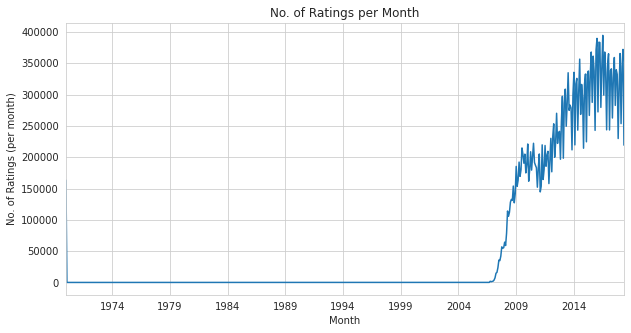

In [ ]:
# plotting distribution of my_last_updated column in df_animelists dataframe
df_animelists.resample('M', on='my_last_updated')['my_score'].count().plot(figsize = (10,5), title = "No. of Ratings per Month")
plt.xlabel('Month')
plt.ylabel('No. of Ratings (per month)')

Observing the graph it seems that my_last_updated column only has 1970-01-01 date as outlier and no other outlier date is in between the date 1970-01-01 and 2004-11-05 .

In [ ]:
# checking datapoints having 1970-01-01 date in my_last_updated column in df_animelists dataframe
df_animelists[df_animelists['my_last_updated'] == '1970-01-01']

,username,anime_id,my_watched_episodes,my_score,my_status,my_last_updated
4013734,Ixio,688,0,0,6,1970-01-01
1750556,Chued,1913,0,0,6,1970-01-01
1750545,Chued,1519,12,9,2,1970-01-01
334922,Swarnadeep,1575,25,5,2,1970-01-01
334923,Swarnadeep,1686,1,6,2,1970-01-01
...,...,...,...,...,...,...
2871610,MisterYoda,92,39,6,2,1970-01-01
25757454,Clay_e07,2236,1,9,2,1970-01-01
2328771,thuyquai,856,0,5,4,1970-01-01
2328766,thuyquai,177,0,0,4,1970-01-01


In [ ]:
# droping the rows having 1970-01-01 date in my_last_updated column in df_animelists dataframe
df_animelists = df_animelists.drop(index = df_animelists[df_animelists['my_last_updated'] == '1970-01-01'].index.tolist(), axis = 0)
df_animelists.head(2)

,username,anime_id,my_watched_episodes,my_score,my_status,my_last_updated
24994054,martino,65,12,9,2,2006-09-27
5300,Xinil,396,4,0,4,2006-09-27


In [ ]:
# checking the shape of df_animelists dataframe after data cleaning
df_animelists.shape

(31120556, 6)

Text(0, 0.5, 'No. of Ratings(per month)')

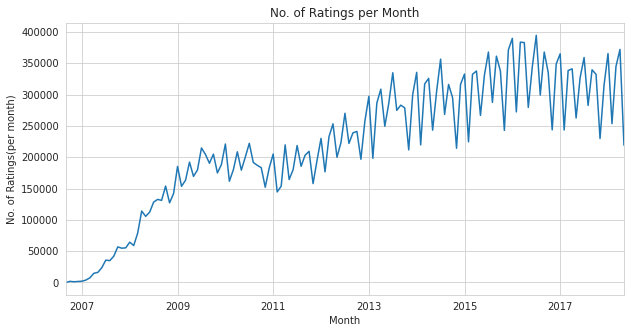

In [ ]:
# Again plotting distribution of my_last_updated column after removing outlier dates
df_animelists.resample('M', on='my_last_updated')['my_score'].count().plot(figsize = (10,5), title = 'No. of Ratings per Month')
plt.xlabel('Month')
plt.ylabel('No. of Ratings(per month)')

## 3.7 Cleaning rows w.r.t. my_score column in df_animelists dataframe

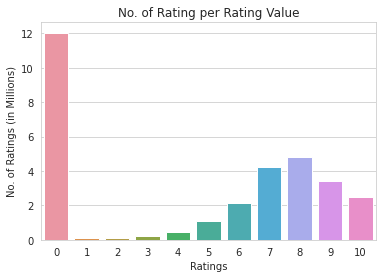

<Figure size 720x360 with 0 Axes>

In [ ]:
# plotting and checking the distribution of my_score column in df_animelists dataframe
fig, ax = plt.subplots()
sns.countplot(df_animelists.my_score)
plt.title('No. of Rating per Rating Value')
plt.xlabel('Ratings')
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e6))
ax.yaxis.set_major_formatter(ticks_y)
plt.ylabel('No. of Ratings (in Millions)')
plt.figure(figsize = (10,5))
plt.show()

As it can be seen from the my_score column distribution that my_score with 0 value has huge number of distibution.

But on MyAnimeList website the user can only rate anime between the scale of 1 to 10. So all the rows having value of my_score equals to 0 has no significance and we have to remove such rows.

In [ ]:
# checking the total number of rows having my_score value equals to 0 in df_animelists dataframe
df_animelists[df_animelists['my_score'] == 0].shape

(12045699, 6)

In [ ]:
# dropping all rows having my_score value equal to 0 in df_animelists dataframe
df_animelists = df_animelists.drop(df_animelists[df_animelists['my_score'] == 0].index.tolist(), axis = 0)
df_animelists.shape

(19074857, 6)

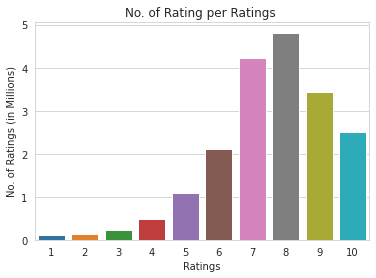

In [ ]:
# after cleaning again plotting the distribution of my_score column in df_animelists dataframe
fig, ax = plt.subplots()
sns.countplot(df_animelists.my_score)
plt.title('No. of Rating per Ratings ')
plt.xlabel('Ratings')
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e6))
ax.yaxis.set_major_formatter(ticks_y)
plt.ylabel('No. of Ratings (in Millions)')
plt.show()

## 3.8 Cleaning rows with respect to my_status column in df_animelists

my_status colummn in animelists tables contains integer values and their semantics are:

1: watching     
2: completed      
3: on hold      
4: dropped        
6: plan to watch  

We will first check the my_status column and if their are any other values apart from 1, 2, 3, 4 and 6 then we will remove such rows from df_animelists dataframe.

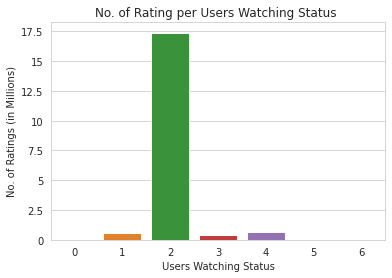

In [ ]:
# plotting the distribution of my_status column in df_animelists dataframe
fig, ax = plt.subplots()
sns.countplot(df_animelists.my_status)
plt.title('No. of Rating per Users Watching Status ')
plt.xlabel('Users Watching Status')
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e6))
ax.yaxis.set_major_formatter(ticks_y)
plt.ylabel('No. of Ratings (in Millions)')
plt.show()

Ater observing the above graph:

We need to remove rows having my_status value equal to 0 and 5, as it does not have any known significance to it.

In [ ]:
# checking the total number of rows having my_status value equals to 0 in df_animelists dataframe
df_animelists[df_animelists['my_status'] == 0].shape

(51, 6)

In [ ]:
# checking the total number of rows having my_status value equals to 5 in df_animelists dataframe
df_animelists[df_animelists['my_status'] == 5]

,username,anime_id,my_watched_episodes,my_score,my_status,my_last_updated
,,,,,,
2362602,tappe,3927,25,7,5,2009-03-31


In [ ]:
# droping all the rows having my_status values equal to 0 and 5 in df_animelists dataframe
df_animelists = df_animelists.drop(df_animelists[df_animelists['my_status'] == 0].index.tolist(), axis = 0)
df_animelists = df_animelists.drop(df_animelists[df_animelists['my_status'] == 5].index.tolist(), axis = 0)

In [ ]:
# checking the shape of df_animelists dataframe after data cleaning
df_animelists.shape

(19074805, 6)

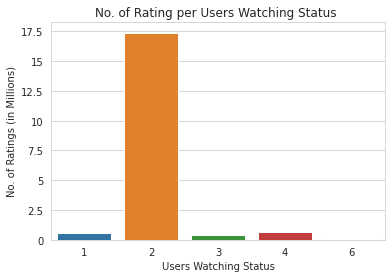

In [ ]:
# again plotting and cross checking the distribution of my_score column in df_animelists dataframe
fig, ax = plt.subplots()
sns.countplot(df_animelists.my_status)
plt.title('No. of Rating per Users Watching Status ')
plt.xlabel('Users Watching Status')
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e6))
ax.yaxis.set_major_formatter(ticks_y)
plt.ylabel('No. of Ratings (in Millions)')
plt.show()

## 3.9 Basic Statistics on cleaned dataset

In [ ]:
# printing total number of rating, users and anime from the cleaned df_animelists dataframe
print("Total No of Ratings in df_animelists dataframe :", len(df_animelists))
print("Total No of Users in df_animelists dataframe   :", len(np.unique(df_animelists.username)))
print("Total No of Animes in df_animelists dataframe  :", len(np.unique(df_animelists.anime_id)))

Total No of Ratings in df_animelists dataframe : 19074805
Total No of Users in df_animelists dataframe   : 106353
Total No of Animes in df_animelists dataframe  : 6598


In [ ]:
# printing total number of animes in the cleaned df_anime dataframe
print("Total No of Animes in df_anime dataframe  :", len(np.unique(df_anime.anime_id)))

# printing total number of users in the cleaned df_users dataframe
print("Total No of Animes in df_anime dataframe  :", len(np.unique(df_users.username)))

Total No of Animes in df_anime dataframe  : 6662
Total No of Animes in df_anime dataframe  : 108705


In [ ]:
# mean my_score value of all users
print("Mean value of all the rating given by the user  : ",df_animelists['my_score'].mean())

Mean value of all the rating given by the user  :  7.592238557615661


# 4. Data Splitting

## 4.1 Concatinating all the three dataframe 

Checking all the three dataframe before concatinating into single dataframe.

In [ ]:
df_anime.head(1)

,anime_id,title,image_url,type,source,episodes,studio,genre
0,11013,Inu x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,David Production,"Comedy, Supernatural, Romance, Shounen"


In [ ]:
df_animelists.head(1)

,username,anime_id,my_watched_episodes,my_score,my_status,my_last_updated
0,martino,65,12,9,2,2006-09-27


In [ ]:
df_users.head(1)

,username,user_id,gender,location,birth_date
0,karthiga,2255153,Female,"Chennai, India",1990-04-29


We will be droping image_url column in df_anime dataframe because it does not have any use in building ml model and its just for showing image of anime poster.

In [ ]:
# concatinating df_animelists and df_anime dataframe using anime_id as common column in both dataframe
df = pd.merge(df_animelists, df_anime.drop(['image_url'], axis = 1), on = 'anime_id')

# now concatinating df_users dataframe using username as common column in both dataframe4
df = pd.merge(df, df_users.drop(['location','birth_date'], axis = 1), on = 'username')
df.head(2)

,username,anime_id,my_watched_episodes,my_score,my_status,my_last_updated,title,type,source,episodes,studio,genre,user_id,gender
0,karthiga,21,586,9,1,2013-03-03,One Piece,TV,Manga,0,Toei Animation,"Action, Adventure, Comedy, Super Power, Drama,...",2255153,Female
1,karthiga,59,26,7,2,2013-03-10,Chobits,TV,Manga,26,Madhouse,"Sci-Fi, Comedy, Drama, Romance, Ecchi, Seinen",2255153,Female


In [ ]:
# checking the shape of final concatinated dataframe
df.shape

(19073095, 14)

## 4.2 Spliting dataset into train and test 

We will be splitting our final concatinated dataframe using my_last_updated column.

We will be first sorting the dataframe w.r.t. my_last_updated column and then we will split the final concatinated dataframe into 80:20 ratio for train and test dataset respectively.

Here basically we are doing the time-series spliting of the dataset based on users last updated date for rating a particular anime, in which we will be using first 80% of data that user has last updated as training dataset and remaining 20% dataset as test dataset.

In [ ]:
# sorting the dataframe dased on my_last_updated column
df.sort_values(by='my_last_updated', inplace=True)

# spliting dataframe into train and test dataframe
df_train = df.iloc[:int(df.shape[0]*0.80)]
df_test = df.iloc[int(df.shape[0]*0.80):]

print("df_train shape :", df_train.shape)
print("df_test shape :", df_test.shape)

df_train shape : (15258476, 14)
df_test shape : (3814619, 14)


In [ ]:
# checking train dataframe
df_train.head(2)

,username,user_id,anime_id,my_watched_episodes,my_score,my_status,my_last_updated,title,type,source,episodes,studio,genre,gender
,,,,,,,,,,,,,,
0,martino,390,65,12,9,2,2006-09-27,Rozen Maiden: Träumend,TV,Manga,12,Nomad,"Action, Comedy, Drama, Magic, Seinen",Male
1,Aokaado,3,210,161,9,2,2006-09-27,Ranma ½,TV,Manga,161,Studio Deen,"Slice of Life, Comedy, Martial Arts, Fantasy",Male


In [ ]:
# checking test dataframe
df_test.head(2)

,username,user_id,anime_id,my_watched_episodes,my_score,my_status,my_last_updated,title,type,source,episodes,studio,genre,gender
,,,,,,,,,,,,,,
0,Oakaoak,3346781,1212,26,6,2,2016-07-07,Oban Star-Racers,TV,Original,26,Hal Film Maker,"Adventure, Mecha, Sci-Fi, Shounen",Male
1,brixdan,191639,9041,12,5,2,2016-07-07,IS: Infinite Stratos,TV,Light novel,12,8bit,"Action, Sci-Fi, Harem, Comedy, Ecchi, Mecha",Female


## 4.3 Basic Statistics on Train Dataset 

In [ ]:
# printing total number of rating, users and anime in train dataset
print("Total No of Ratings in Training Dataset :", len(df_train))
print("Total No of Users in Training Dataset   :", len(np.unique(df_train.username)))
print("Total No of Animes in Training Dataset  :", len(np.unique(df_train.anime_id)))

Total No of Ratings in Training Dataset : 15258476
Total No of Users in Training Dataset   : 99169
Total No of Animes in Training Dataset  : 5594


In [ ]:
# calculating mean value of my_score column in df_train dataframe
print("Mean value of all the rating given by the user in Training Dataset : ", df_train['my_score'].mean())

Mean value of all the rating given by the user in Training Dataset :  7.625715962721309


## 4.4 Basic Statistics on Test Dataset

In [ ]:
# printing total number of rating, users and anime in test dataset
print("Total No of Ratings in Test Dataset :", len(df_test))
print("Total No of Users in Test Dataset   :", len(np.unique(df_test.username)))
print("Total No of Animes in Test Dataset  :", len(np.unique(df_test.anime_id)))

Total No of Ratings in Test Dataset : 3814619
Total No of Users in Test Dataset   : 56794
Total No of Animes in Test Dataset  : 6552


In [ ]:
# calculating mean value of my_score column in df_test dataframe
print("Mean value of all the rating given by the user in Test Dataset : ", df_test['my_score'].mean())

Mean value of all the rating given by the user in Test Dataset :  7.458522594261708


# 5. Exploratory Data Analysis 

## 5.1 Distribution of Ratings given by Users

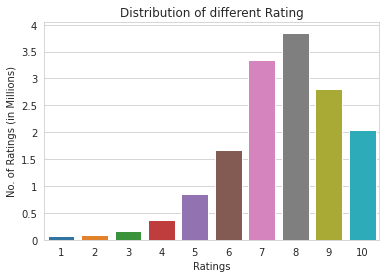

In [ ]:
# plotting the distribution of my_score column in training dataset
fig, ax = plt.subplots()
sns.countplot(df_train.my_score)
plt.title('Distribution of different Rating')
plt.xlabel('Ratings')
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e6))
ax.yaxis.set_major_formatter(ticks_y)
plt.ylabel('No. of Ratings (in Millions)')
plt.show()

It can be observed that most rated value in train dataset by users is 8.

## 5.2 Number of Rating given by Users per Month

Text(0, 0.5, 'No. of Ratings')

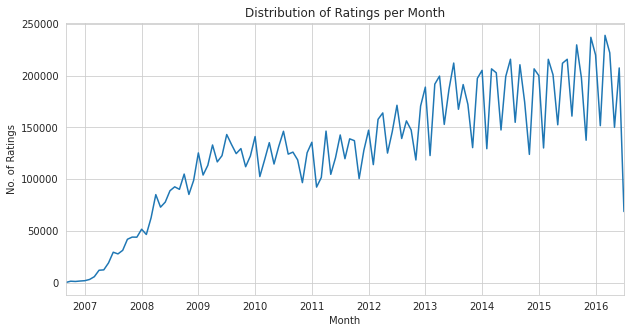

In [ ]:
# plotting distribution of my_last_updated column in df_animelists dataframe
df_train.resample('M', on='my_last_updated')['my_score'].count().plot(figsize = (10,5), title = 'Distribution of Ratings per Month')
plt.xlabel('Month')
plt.ylabel('No. of Ratings')

It can be seen that the Rating given by Users on Anime has been increasing over the years.

## 5.3 Analysis of Ratings given by Users

In [ ]:
# creating the dataset of toatal number of animes rated by each users in decreasing order
anime_rated_by_users = df_train.groupby(by = 'username')['my_score'].count().sort_values(ascending = False)
anime_rated_by_users

username
_thiagobrisolla     2845
Kannei              2715
Shouichirou         2697
GrumpyAnimeSnob     2594
ShanaFlame          2588
                    ... 
Hayito                 1
WaterMystic277         1
Mohcen232000           1
WaterIcePrincess       1
bushido1907            1
Name: my_score, Length: 99169, dtype: int64

The most number of animes rated by a single user in training dataset is 2845 animes.

In [ ]:
print('Total Number of unqiue Users in Training Dataset : ', len(anime_rated_by_users))

Total Number of unqiue Users in Training Dataset :  99169


And the least number of anime rated by a single user in training dataset is 1.

Text(0.5, 1.0, 'PDF')

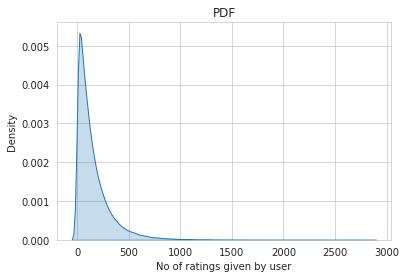

In [ ]:
# plotting PDF of no. of rating given by different user 
sns.kdeplot(anime_rated_by_users, shade=True)
plt.xlabel('No of ratings given by user')
plt.title("PDF")

Text(0, 0.5, 'No. of Animes User has Rated')

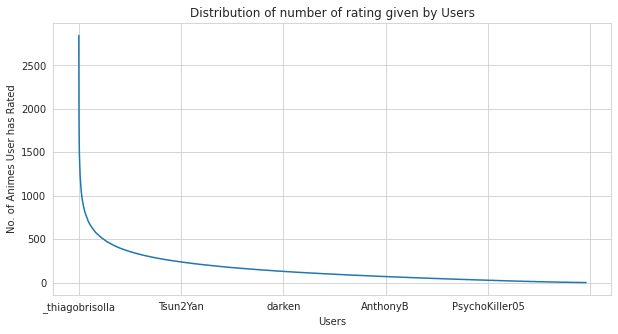

In [ ]:
# plotting distribution graph of no. of rating given by unique users 
anime_rated_by_users.plot(figsize=(10,5), title = 'Distribution of number of rating given by Users')
plt.xlabel('Users')
plt.ylabel('No. of Animes User has Rated')

We can observed that it is a very skewed graph.

It means that the training dataset have some users who have rated huge number of anime.


In [ ]:
# finding the statistical details about the anime_rated_by_users dataframe
anime_rated_by_users.describe()

count    99171.000000
mean       153.874056
std        180.846339
min          1.000000
25%         38.000000
50%         97.000000
75%        204.000000
max       2845.000000
Name: my_score, dtype: float64

To get more information about distribution data in anime_rated_by_users dataframe we can use quantiles.

In [ ]:
# finding the quantile range of anime_rated_by_users dataset
quantiles = anime_rated_by_users.quantile(np.arange(0,1.01,0.01), interpolation='higher')
quantiles[::5]

0.00       1
0.05       5
0.10      12
0.15      20
0.20      29
0.25      38
0.30      48
0.35      59
0.40      71
0.45      84
0.50      97
0.55     113
0.60     131
0.65     151
0.70     174
0.75     204
0.80     239
0.85     286
0.90     359
0.95     495
1.00    2845
Name: my_score, dtype: int64

## 5.4 Analysis of Animes as Rating given by Users

In [ ]:
# creating the dataset of toatal number of rating given to each anime in decreasing order
ratings_per_anime = df_train.groupby('title')['my_score'].count().sort_values(ascending=False)
ratings_per_anime.head(5)

It seems that Death Note is the most popular and rated Anime by Users.

In [ ]:
ratings_per_anime.tail(5)

title
Nobunaga no Shinobi                 1
Gamba: Gamba to Nakama-tachi        1
Tsumamigui 3 The Animation          1
Kobayashi-san Chi no Maid Dragon    1
ēlDLIVE                             1
Name: my_score, dtype: int64

In [ ]:
print('Total no. of Anime in training dataset : ', len(ratings_per_anime))

Total no. of Anime in training dataset :  5594


Text(0.5, 1.0, 'PDF')

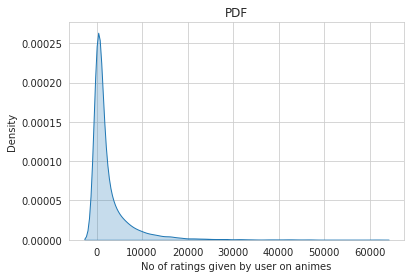

In [ ]:
# plotting PDF of no. of rating given by user on different anime 
sns.kdeplot(ratings_per_anime, shade=True)
plt.xlabel('No of ratings given by user on animes')
plt.title("PDF")

Text(0, 0.5, 'No of Users who rated a Anime')

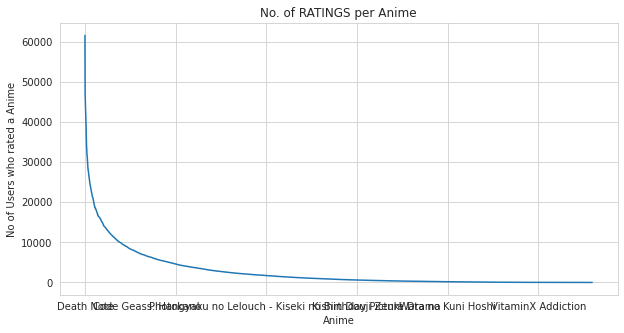

In [ ]:
# plotting distribution graph of no. of rating given on each anime
ratings_per_anime.plot(figsize=(10,5), title = 'No. of RATINGS per Anime')
plt.xlabel('Anime')
plt.ylabel('No of Users who rated a Anime')

We can observed that it is a very skewed graph.

It shows that the training dataset have some anime which are rated by huge number users.


In [ ]:
# finding the statistical details about the anime_rated_by_users dataframe
ratings_per_anime.describe()

count     5594.000000
mean      2727.650340
std       4977.934471
min          1.000000
25%        132.250000
50%        756.500000
75%       2996.750000
max      61547.000000
Name: my_score, dtype: float64

## 5.5 Analysis of Rating on Users Watching Status

my_status column contains integer values and their semantics are:

1: watching     
2: completed      
3: on hold      
4: dropped        
6: plan to watch  

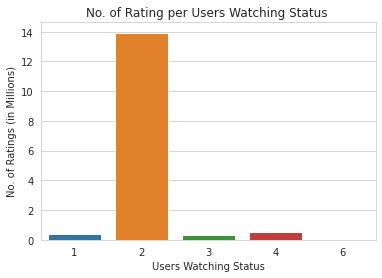

In [ ]:
# plotting the distribution graph between users watching status vs no of rating by users
fig, ax = plt.subplots()
sns.countplot(df_train.my_status)
plt.title('No. of Rating per Users Watching Status ')
plt.xlabel('Users Watching Status')
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e6))
ax.yaxis.set_major_formatter(ticks_y)
plt.ylabel('No. of Ratings (in Millions)')
plt.show()

The above above graph shows that the most users who has rated an anime has completed watching that particular anime.

It also helps the training dataset which means most of the rating by users are given when they have completely watched the anime and not half watched the anime. 

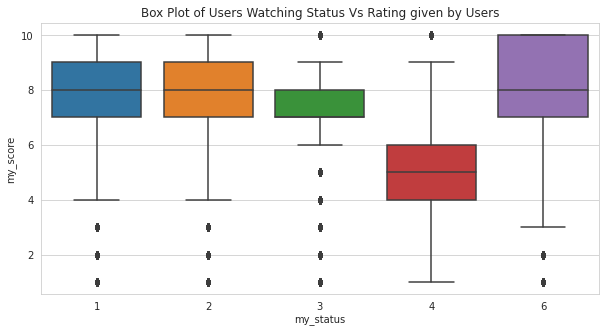

In [ ]:
# plotting Box Plot between users watching status vs rating given by users
fig = plt.figure(figsize = (10,5))
sns.boxplot(x='my_status', y ='my_score', data=df_train)
plt.title('Box Plot of Users Watching Status Vs Rating given by Users')
plt.show()

From the above Box Plot we can clearly see that Inter Quantile Range(IQR) of my_status equals to 4 is very seperated from Inter Quantile Range of other values of my_status.

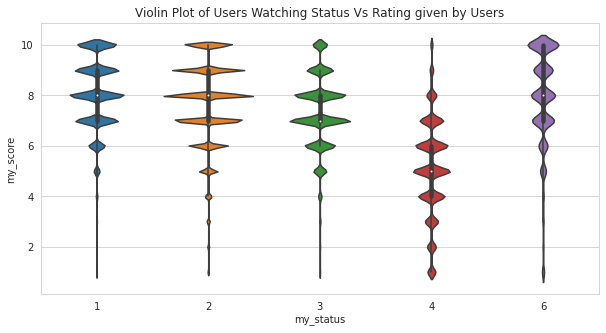

In [ ]:
# plotting Violin Plot between users watching status vs rating given by users
fig = plt.figure(figsize=(10,5))
sns.violinplot(x="my_status", y="my_score", data=df_train)
plt.title('Violin Plot of Users Watching Status Vs Rating given by Users')
plt.show()

From the above Violin Plot we can observe the distribution of different rating given by users on each value of users watching status.

And the distribution of different rating given by users on each value of users watching status has some variation from each other.

In [ ]:
# creating dataframe of count of different rating given by on each users watching status
df_plot = df_train.groupby(['my_score', 'my_status']).size().reset_index().pivot(columns='my_score', index='my_status', values=0)
df_plot

my_score,1,2,3,4,5,6,7,8,9,10
my_status,,,,,,,,,,
1,582,595,945,2606,10667,29828,78489,100312,79855,71908
2,45581,67011,122078,279142,695438,1476399,3068728,3611645,2648629,1922303
3,714,961,2065,5798,22591,53440,106593,91143,46109,25432
4,24316,26903,40324,80513,114307,99622,71919,30405,10648,5938
6,1482,573,732,880,4361,6649,16344,17780,14293,22900


Text(0.5, 1.0, 'Stacked Bar Plot of Count of different Rating on Users Watching Status')

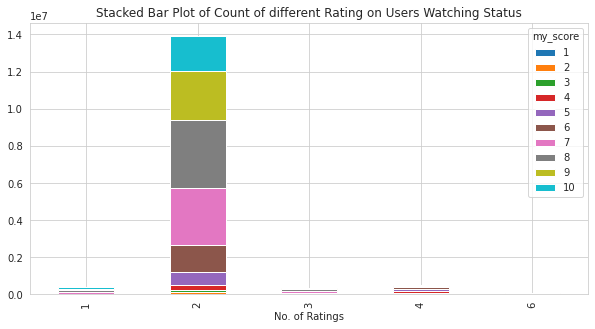

In [ ]:
# plotting the Stacked Bar Plot of count of different rating given by users on each users watching status
df_plot.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.xlabel('No. of Ratings')
plt.title('Stacked Bar Plot of Count of different Rating on Users Watching Status')

The above Stacked Bar Plot gives idea about the count of differnt rating given by users on each users watching status.

It can be seen that the most rated value by users in my_status=2(i.e. watching status is completed) is 8.

In [ ]:
# Printing the average rating given by users on each watching status of users in descending order
avg_status = df_train.groupby(by=['my_status'])['my_score'].mean()
print("Average ratings w.r.t users waching status :")
print(avg_status.sort_values(ascending=False))

Average ratings w.r.t users waching status :
my_status
1    8.081780
6    7.957858
2    7.708495
3    7.355907
4    5.134331
Name: my_score, dtype: float64


So the average rating value of my_status=4 is relatively lower than other status and it can also be easily seperated after observing the Box Plot.

## 5.6 Analysis of Rating on Anime Type

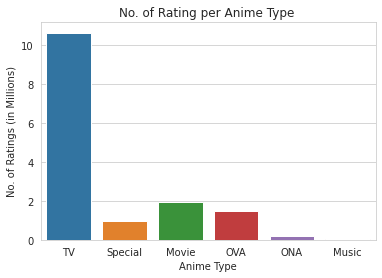

In [ ]:
# plotting the distribution graph between anime type vs no. of rating given by users
fig, ax = plt.subplots()
sns.countplot(df_train.type)
plt.title('No. of Rating per Anime Type ')
plt.xlabel('Anime Type')
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e6))
ax.yaxis.set_major_formatter(ticks_y)
plt.ylabel('No. of Ratings (in Millions)')
plt.show()

The above graph shows that TV anime type is the most rated anime type by the users.

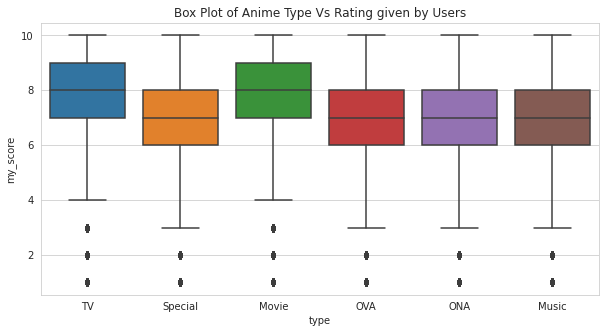

In [ ]:
# plotting Box Plot between anime type vs rating given by users
fig = plt.figure(figsize = (10,5))
sns.boxplot(x='type', y ='my_score', data=df_train)
plt.title('Box Plot of Anime Type Vs Rating given by Users')
plt.show()

From the above graph it seems that TV and Movie anime type has similar Inter Quantile Range and different other anime type.


It can also be seen that Special, OVA, ONA and MUSIC anime type has similar Inter Quantile Range.

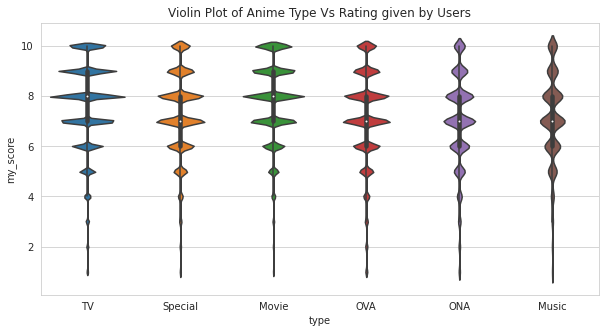

In [ ]:
# plotting Violin Plot between anime type vs rating given by users
fig = plt.figure(figsize=(10,5))
sns.violinplot(x="type", y="my_score", data=df_train)
plt.title('Violin Plot of Anime Type Vs Rating given by Users')
plt.show()

In Violin Plot it can be seen that the distribution of different rating given by users on each anime type has some variation from each other.


In [ ]:
# creating dataframe of count of different rating given by on each anime type
df_plot = df_train.groupby(['my_score', 'type']).size().reset_index().pivot(columns='my_score', index='type', values=0)
df_plot

my_score,1,2,3,4,5,6,7,8,9,10
type,,,,,,,,,,
Movie,4147,6474,13059,32985,87972,188836,413317,512507,392877,307905
Music,178,241,396,919,2902,5234,8285,6692,3591,2988
ONA,1694,2009,3494,6981,16026,28847,46144,40729,23732,15886
OVA,13969,15375,22402,46128,107622,205223,364426,340885,204528,148022
Special,4576,6153,10859,24262,69276,138488,249279,232855,140144,96255
TV,48111,65791,115934,257664,563566,1099310,2260622,2717617,2034662,1477425


Text(0.5, 1.0, 'Stacked Bar Plot of Count of different Rating on each Anime Type')

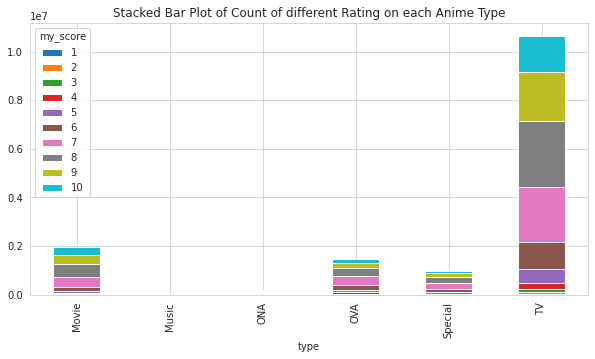

In [ ]:
# plotting the Stacked Bar Plot of count of different rating given by users on each anime type
df_plot.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Stacked Bar Plot of Count of different Rating on each Anime Type')

The above Stacked Bar Plot gives idea about the count of differnt rating given by users on each anime types.

It can be seen that in each anime type has differnt most rated value i.e. 7 or 8.

In [ ]:
# Printing the average rating given by users on each anime type in descending order
avg_status = df_train.groupby(by=['type'])['my_score'].mean()
print("Average ratings w.r.t anime type :")
print(avg_status.sort_values(ascending=False))

Average ratings w.r.t anime type :
type
Movie      7.841167
TV         7.670860
Special    7.360465
OVA        7.262062
Music      7.165023
ONA        7.106844
Name: my_score, dtype: float64


It can be observed that average rating value of different anime type does not show very significant variation.

## 5.7 Analysis of Rating on Anime Source 

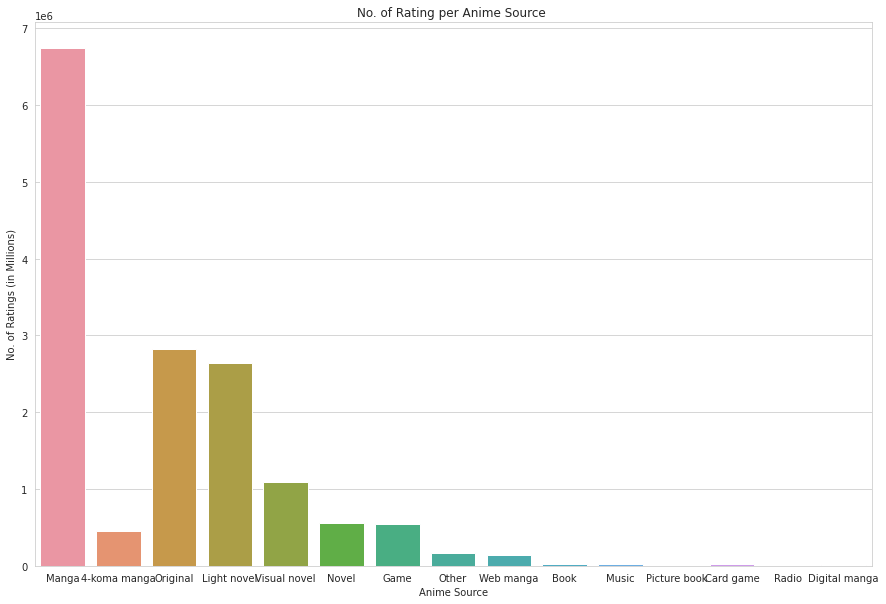

In [ ]:
# plotting the distribution graph between anime source vs no. of rating given by users
fig = plt.figure(figsize = (15,10))
sns.countplot(df_train.source)
plt.title('No. of Rating per Anime Source ')
plt.xlabel('Anime Source')
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e6))
ax.yaxis.set_major_formatter(ticks_y)
plt.ylabel('No. of Ratings (in Millions)')
plt.show()

The above graph looks very skewed as most count of users rating belongs to Manga, Original, Light Novel and Visual Novel. 

But rest of the anime sources has very less count of users rating and in some cases even non existing count of users rating.

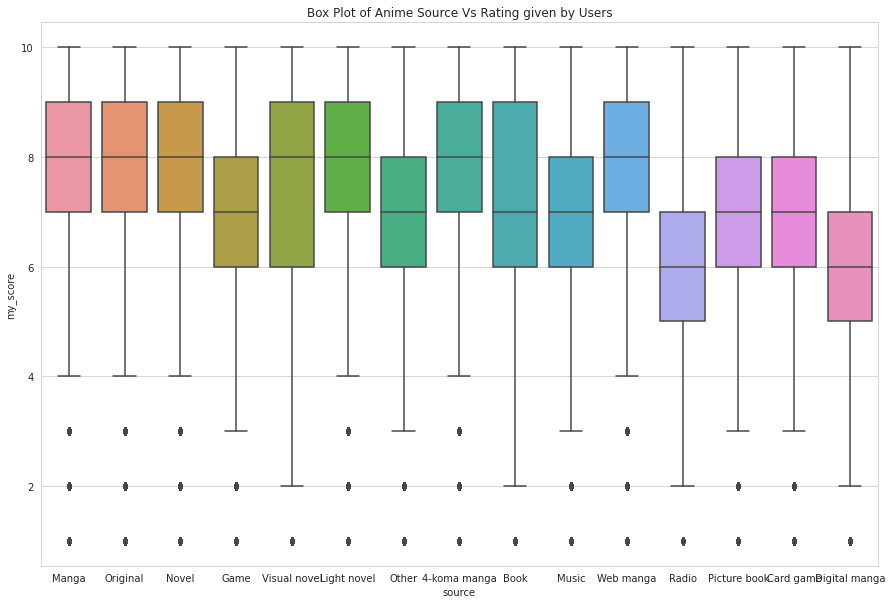

In [ ]:
# plotting Box Plot between anime source vs rating given by users
fig = plt.figure(figsize = (15,10))
sns.boxplot(x='source', y ='my_score', data=df_train)
plt.title('Box Plot of Anime Source Vs Rating given by Users')
plt.show()

There are lot of anime sources which has same Inter Quantile Range and there are overlapping on each other.

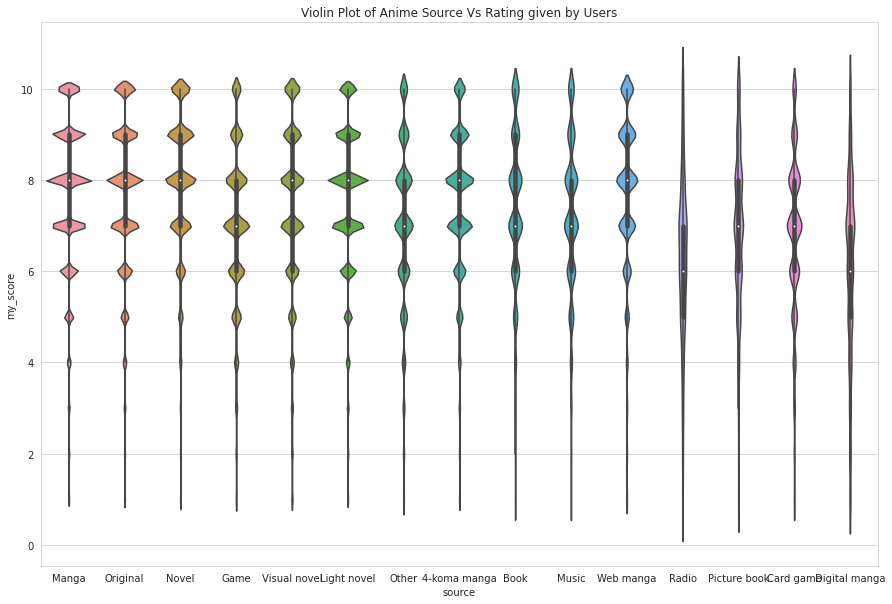

In [ ]:
# plotting Violin Plot between anime source vs rating given by users
fig = plt.figure(figsize=(15,10))
sns.violinplot(x="source", y="my_score", data=df_train)
plt.title('Violin Plot of Anime Source Vs Rating given by Users')
plt.show()

Variation in distribution can be seen in above Violin Plot of various anime sources

In [ ]:
# creating dataframe of count of different rating given by on each anime source
df_plot = df_train.groupby(['my_score', 'source']).size().reset_index().pivot(columns='my_score', index='source', values=0)
df_plot

my_score,1,2,3,4,5,6,7,8,9,10
source,,,,,,,,,,
4-koma manga,1951,2573,4658,10132,26746,52817,108263,124195,78897,47629
Book,128,158,326,729,1850,3616,6197,5810,3597,3082
Card game,203,282,645,1314,2612,4649,6963,5491,2667,1522
Digital manga,119,181,219,378,605,798,1132,710,287,140
Game,3490,5373,9832,21419,49696,86989,139988,115422,64635,46068
Light novel,10597,15593,28476,62065,140752,289398,609007,708017,477296,304238
Manga,28074,36942,64504,147503,350493,708309,1469600,1723567,1268810,941674
Music,150,225,405,923,2173,3883,6494,5986,3349,2637
Novel,1495,1911,3889,8915,21169,45025,103841,150270,129256,92028


Text(0.5, 1.0, 'Stacked Bar Plot of Count of different Rating on each Anime Type')

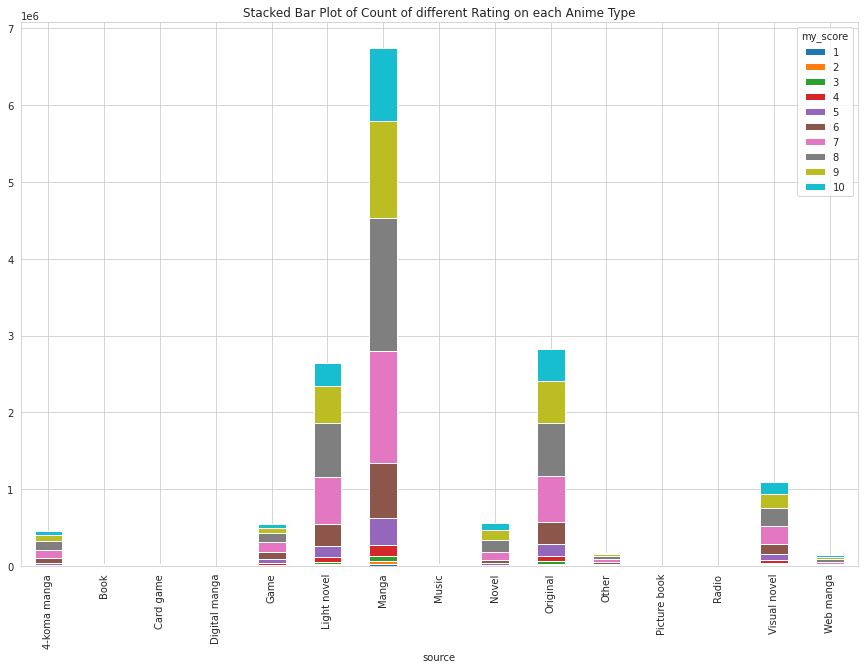

In [ ]:
# plotting the Stacked Bar Plot of count of different rating given by users on each anime source
df_plot.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Stacked Bar Plot of Count of different Rating on each Anime Type')

The above Stacked Bar Plot gives idea about the count of differnt rating given by users on each anime sources.

It can be seen that each anime sources has differnt most rated value i.e. 7 or 8. 

In [ ]:
# Printing the average rating given by users on each anime source in descending order
avg_status = df_train.groupby(by=['source'])['my_score'].mean()
print("Average ratings w.r.t anime source :")
print(avg_status.sort_values(ascending=False))

Average ratings w.r.t anime source :
source
Novel            7.962133
Web manga        7.789984
Manga            7.685993
Original         7.683761
Light novel      7.590743
4-koma manga     7.535027
Visual novel     7.429306
Book             7.387754
Music            7.226959
Other            7.086088
Game             7.083117
Picture book     6.880628
Card game        6.862153
Radio            6.270633
Digital manga    6.139199
Name: my_score, dtype: float64


The Average rating given by users on each sources varies a quite from with the highest average anime source value being 7.96 of Novel anime source and lowest average anime source value being 6.13 of Digital Manga anime source.

## 5.8 Analysis of Rating on Total No. of Episodes in each Anime 

In [ ]:
# creating the dataset of toatal number of rating given to each anime in decreasing order
ratings_per_anime_episodes = df_train.groupby(by='episodes')['my_score'].count().sort_values(ascending=False)
ratings_per_anime_episodes

episodes
12     3468302
1      3191193
13     1881206
26     1136554
24     1082082
        ...   
215          3
199          1
263          1
164          1
151          1
Name: my_score, Length: 157, dtype: int64

In [ ]:
print("Total number different no. of episodes in animes is : ", len(ratings_per_anime_episodes))

Total number different no. of episodes in animes is :  157


Text(0, 0.5, 'No. of Rating given by User (in Million)')

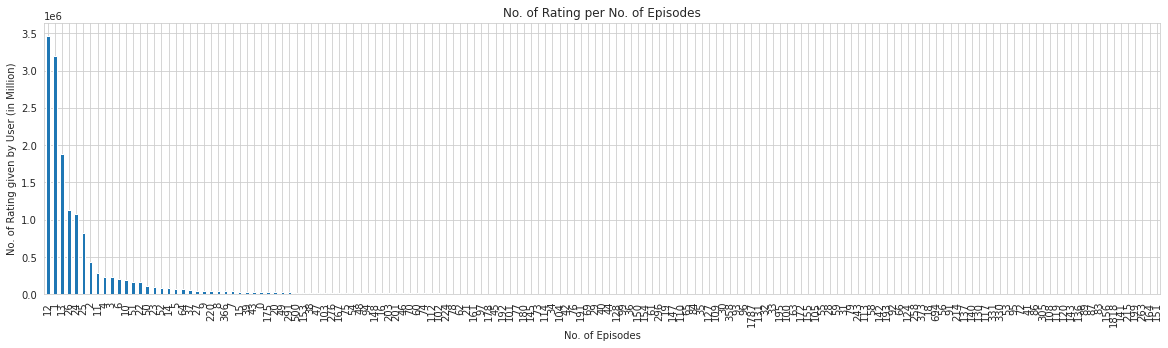

In [ ]:
# Plotting the bar plot of no. of rating given by user on each no. episodes
ratings_per_anime_episodes.plot(kind = 'bar', figsize = (20,5), title = 'No. of Rating per No. of Episodes')
plt.xlabel('No. of Episodes')
plt.ylabel('No. of Rating given by User (in Million)')

Text(0, 0.5, 'No. of Rating given by User (in Million)')

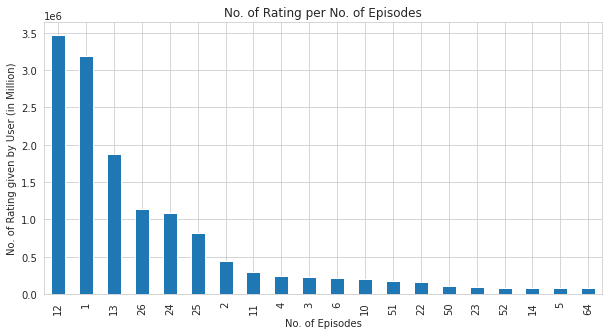

In [ ]:
# Plotting the bar plot of Top 20 no. of rating given by user on each no. episodes
ratings_per_anime_episodes[:20].plot(kind = 'bar', figsize = (10,5), title = 'No. of Rating per No. of Episodes')
plt.xlabel('No. of Episodes')
plt.ylabel('No. of Rating given by User (in Million)')

## 5.9 Analysis of Rating on Anime Studios

In [ ]:
# grouping and counting the rating given by users on different anime studios
studio_rated_by_users = df_train.groupby(by='studio')['my_score'].count().sort_values(ascending=False)
studio_rated_by_users

studio
Madhouse                                        1014834
J.C.Staff                                        883541
Toei Animation                                   676134
Studio Deen                                      650739
Sunrise                                          614108
                                                 ...   
Studio Pierrot, Studio Gallop                         1
NUT                                                   1
Shogakukan Music &amp; Digital Entertainment          1
Dongwoo A&amp;E                                       1
Production I.G, DLE                                   1
Name: my_score, Length: 591, dtype: int64

As it can be seen that there are various animes with more than one studio.

So, we need to seperate the each studio and count the rating given by users on each studios.

In [ ]:
# creating the list of unique anime studios
studio = df_train['studio'].values
studio_list = [] 

for i in tqdm(range(len(studio))):
    stu = studio[i].split(", ")
    for j in range(len(stu)):
        if stu[j] not in studio_list:
            studio_list.append(stu[j])

100%|██████████| 15258476/15258476 [00:29<00:00, 514293.36it/s]


In [ ]:
# checking the total number of unique anime studios
len(studio_list)

381

In [ ]:
# creating list of count of rating given by users on unique anime studios
studio_count = []
for i in tqdm(range(len(studio_list))):
    count = 0
    for j in range(len(df_train)):
        if studio_list[i] in studio[j]:
            count += 1
    studio_count.append(count)

100%|██████████| 381/381 [22:31<00:00,  3.55s/it]


In [ ]:
# creating dataframe of studio and their count of rating given by users
df_studio = pd.DataFrame({'Studio' : studio_list, 'Studio Count' : studio_count})
df_studio = df_studio.set_index('Studio')
df_studio.sort_values(by = 'Studio Count', ascending = False, inplace = True)
df_studio.head()

,Studio Count
Studio,
Madhouse,1094580
J.C.Staff,904186
A-1 Pictures,711624
Toei Animation,688585
Studio Deen,679376


Text(0, 0.5, 'No. of rating by Users (in Millions)')

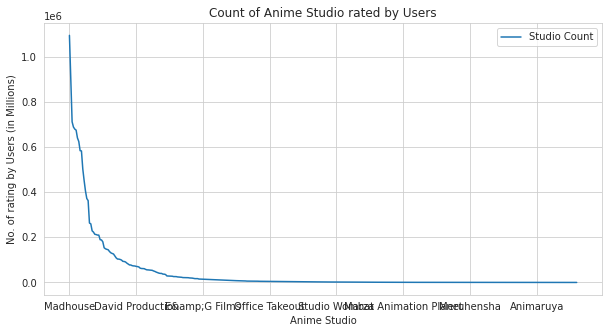

In [ ]:
# plotting the distribution of rating given by users on unique anime studios
df_studio.plot(figsize = (10,5), title = "Count of Anime Studio rated by Users")
plt.xlabel("Anime Studio")
plt.ylabel("No. of rating by Users (in Millions)")

The above graph is very skewed as their are very few studios which has most counts of users rating.



Text(0, 0.5, 'No. of rating by Users (in Million)')

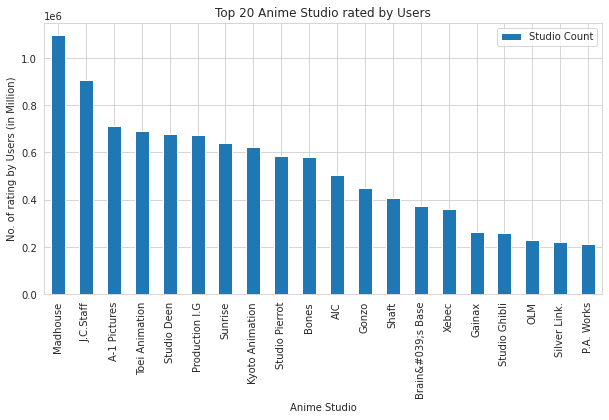

In [ ]:
# plotting the bar plot of top 20 anime studio rated by users
df_studio[:20].plot.bar(figsize = (10,5), title = "Top 20 Anime Studio rated by Users")
plt.xlabel("Anime Studio")
plt.ylabel("No. of rating by Users (in Million)")

## 5.10 Analysis of Rating on Genres in Anime

For each anime their are various animes genre that can be associate to particular anime.

So, we need to seperate the each anime genre and count the rating given by users on each genre.

In [ ]:
# creating the list of unique anime genres
genres = df_train['genre'].values
genre_list = [] 

for i in tqdm(range(len(genres))):
    gen = genres[i].split(", ")
    for j in range(len(gen)):
        if gen[j] not in genre_list:
            genre_list.append(gen[j])

100%|██████████| 15258476/15258476 [00:44<00:00, 340701.65it/s]


In [ ]:
# checking the total number of unique anime genres
len(genre_list)

43

In [ ]:
# creating list of count of ratings given by users on unique anime genres
genre_count = []
for i in tqdm(range(len(genre_list))):
    count = 0
    for j in range(len(df_train)):
        if genre_list[i] in genres[j]:
            count += 1
    genre_count.append(count)

100%|██████████| 43/43 [02:54<00:00,  4.05s/it]


In [ ]:
# creating dataframe of studio and their count of rating given by users
df_genre = pd.DataFrame({'Genre':genre_list, 'Genre Count':genre_count})
df_genre = df_genre.set_index('Genre')
df_genre.sort_values(by = 'Genre Count',ascending = False,inplace=True)
df_genre.head()

,Genre Count
Genre,
Comedy,7902176
Action,6431081
Romance,4987740
Drama,4456108
Fantasy,3864529


Text(0, 0.5, 'No. of rating by Users (in Millions)')

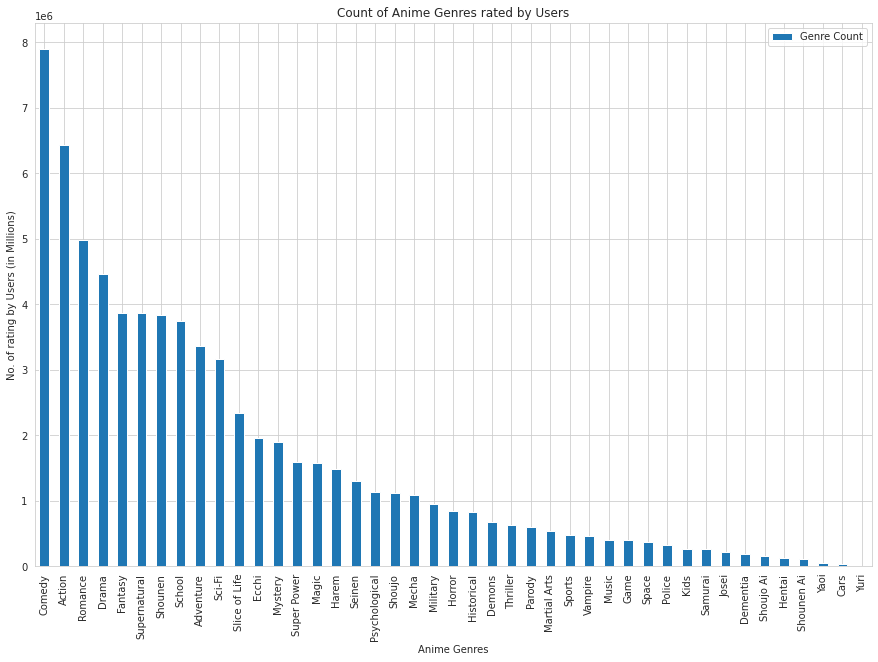

In [ ]:
# plotting the distribution of rating given by users on unique anime genres
df_genre.plot.bar(figsize = (15,10), title = "Count of Anime Genres rated by Users")
plt.xlabel("Anime Genres")
plt.ylabel("No. of rating by Users (in Millions)")

Text(0, 0.5, 'No. of rating by Users (in Millions)')

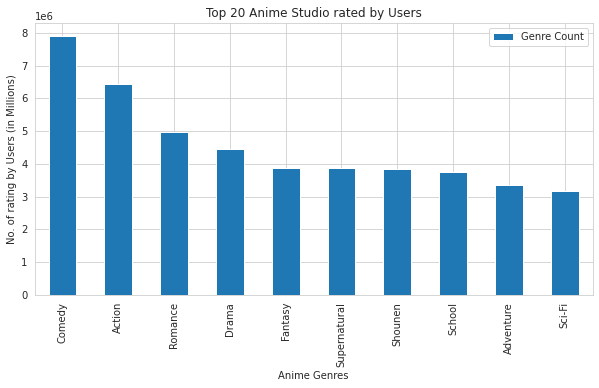

In [ ]:
# plotting the bar plot of top 10 anime genres rated by users
df_genre[:10].plot.bar(figsize = (10,5), title = "Top 20 Anime Studio rated by Users")
plt.xlabel("Anime Genres")
plt.ylabel("No. of rating by Users (in Millions)")

## 5.11 Analysis of Rating on Users Gender

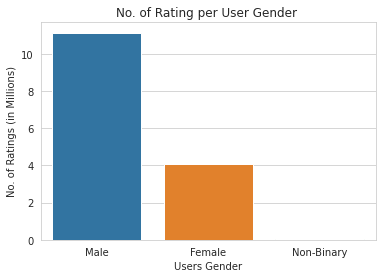

In [ ]:
# plotting the distribution graph between users gender vs no. of rating given by users
fig, ax = plt.subplots()
sns.countplot(df_train.gender)
plt.title('No. of Rating per User Gender ')
plt.xlabel('Users Gender')
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e6))
ax.yaxis.set_major_formatter(ticks_y)
plt.ylabel('No. of Ratings (in Millions)')
plt.show()

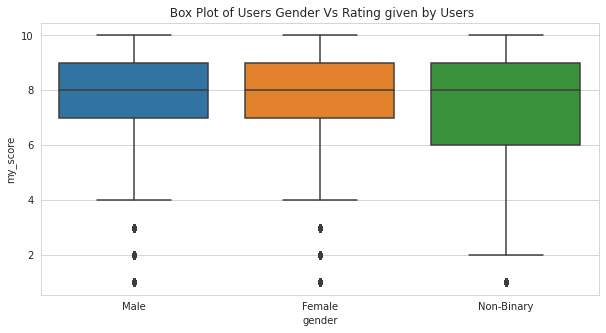

In [ ]:
# plotting Box Plot between users gender vs rating given by users
fig = plt.figure(figsize=(10,5))
sns.boxplot(x='gender', y ='my_score', data=df_train)
plt.title(' Box Plot of Users Gender Vs Rating given by Users')
plt.show()

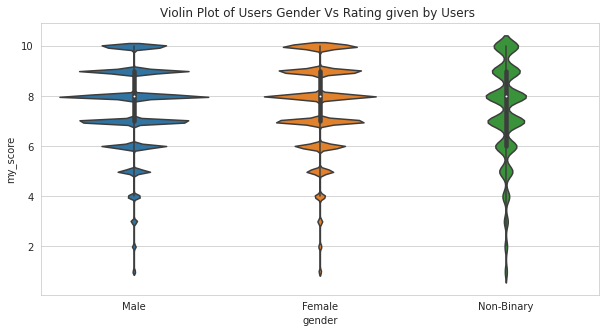

In [ ]:
# plotting Violin Plot between anime source vs rating given by users
fig = plt.figure(figsize=(10,5))
sns.violinplot(x="gender", y="my_score", data=df_train)
plt.title('Violin Plot of Users Gender Vs Rating given by Users ')
plt.show()

In [ ]:
# creating dataframe of count of different rating given by on user gender
df_plot = df_train.groupby(['my_score', 'gender']).size().reset_index().pivot(columns='my_score', index='gender', values=0)
df_plot

my_score,1,2,3,4,5,6,7,8,9,10
gender,,,,,,,,,,
Female,20588,26582,41623,95993,232552,439463,833187,952767,763663,654232
Male,51435,68665,123280,270766,610593,1219655,2497071,2885573,2026937,1386436
Non-Binary,652,796,1241,2180,4219,6820,11815,12945,8934,7813


Text(0.5, 1.0, 'Stacked Bar Plot of Count of different Rating w.r.t Users Gender')

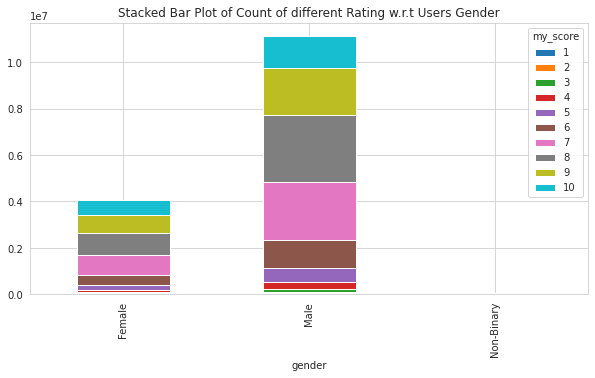

In [ ]:
# plotting the Stacked Bar Plot of count of different rating given by users w.r.t. users gender
df_plot.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Stacked Bar Plot of Count of different Rating w.r.t Users Gender')

In [ ]:
# Printing the average rating given by users as per users gender in descending order
avg = df_train.groupby(by=['gender'])['my_score'].mean()
print("Average ratings w.r.t user gender :")
print(avg.sort_values(ascending=False))

Average ratings w.r.t user gender :
gender
Female        7.696271
Male          7.601464
Non-Binary    7.341339
Name: my_score, dtype: float64


## 5.12 Plotting Correlation between multiple Features

In [ ]:
# copying train dataframe for creating dataframe for correlation calculation
df_train_corr = df_train.copy()

# Applying Label Encoding of categorical features variables
enconder = LabelEncoder()
username_labels = enconder.fit_transform(df_train_corr['username'])
type_labels = enconder.fit_transform(df_train_corr['type'])
source_labels = enconder.fit_transform(df_train_corr['source'])
gender_labels = enconder.fit_transform(df_train_corr['gender'])

# appending label encoded feature on correlation dataframe
df_train_corr['username_labels'] = username_labels
df_train_corr['type_labels'] = type_labels
df_train_corr['source_labels'] = source_labels
df_train_corr['gender_labels'] = gender_labels

# droping the categorical features after appending its label encoded features
df_train_corr = df_train_corr.drop(['username','my_last_updated','title','type','source','studio','genre','gender'], axis = 1)
df_train_corr.head(2)

,user_id,anime_id,my_watched_episodes,my_score,my_status,episodes,username_labels,type_labels,source_labels,gender_labels
0,2255153,14713,13,10,2,13,78920,5,6,0
1,2255153,120,26,7,2,26,78920,5,6,0


Text(0.5, 1.0, 'Correlation between Multiple Featues in Training Dataset')

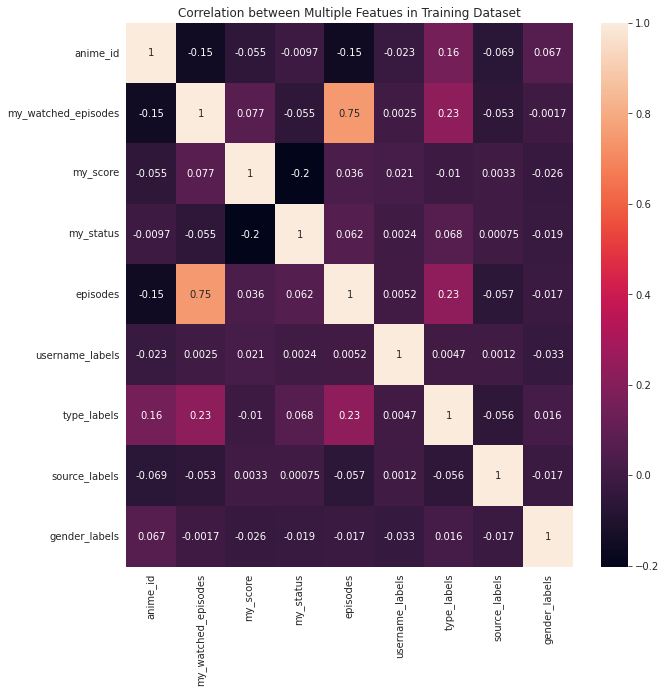

In [ ]:
# plotting the correlation heatmap for visualising the relationship between the various features
plt.figure(figsize = (5,5))
cor = df_train_corr.corr()
sns.heatmap(cor, annot = True)
plt.title('Correlation between Multiple Featues in Training Dataset')

From the above Correlation Heatmap, we can observe that the Highest Correlation of about 75% is between No. of Episodes in Anime (i.e. 'episodes' feature)and No. of Episodes watched by User (i.e. 'my_watched_episodes' feature) in given anime.

So we will drop the 'my_watched_episodes' column as it is highly corelated with 'episodes' column and we will retain the 'episodes' column.

And the Least Correlation value of about 0.075% is between 'source_label' and 'my_status' features.

In [ ]:
# dropping the 'my_watched_episodes' column from train and test dataset
df_train = df_train.drop(['my_watched_episodes'], axis = 1)
df_test = df_test.drop(['my_watched_episodes'], axis = 1)

df_train.head(2)

,username,user_id,anime_id,my_score,my_status,my_last_updated,title,type,source,episodes,studio,genre,gender
0,karthiga,2255153,14713,10,2,2013-03-03,Kamisama Hajimemashita,TV,Manga,13,TMS Entertainment,"Comedy, Demons, Supernatural, Romance, Fantasy...",Female
1,karthiga,2255153,120,7,2,2013-03-03,Fruits Basket,TV,Manga,26,Studio Deen,"Slice of Life, Comedy, Drama, Romance, Fantasy...",Female


## 5.13 Finding various Average values 

Finding different average values to get generalize idea about the dataset.

### 5.13.1 Finding Global Average of all Anime Ratings given by Users

In [ ]:
print('The Global Average of all Anime Rating given by Users is : ', df_train['my_score'].mean())

The Global Average of all Anime Rating given by Users is :  7.625715962721309


### 5.13.2 Finding Average No. of Rating given by each Users

In [ ]:
anime_rated_by_users = df_train.groupby(by = 'username')['my_score'].count().sort_values(ascending = False)
anime_rated_by_users

username
_thiagobrisolla    2845
Kannei             2715
Shouichirou        2697
GrumpyAnimeSnob    2594
ShanaFlame         2588
                   ... 
Matth_Parker          1
ScienceNinja          1
ZashShin              1
MaxVenturi            1
Bergioyn              1
Name: my_score, Length: 99169, dtype: int64

In [ ]:
print('The Average No. of Rating given by each Users is : ', np.round(anime_rated_by_users.mean()))

The Average No. of Rating given by each Users is :  154.0


### 5.13.3 Finding Average No. of Rating given on each Animes

In [ ]:
ratings_per_anime = df_train.groupby(by='title')['my_score'].count().sort_values(ascending=False)
ratings_per_anime

title
Death Note                          61547
Code Geass: Hangyaku no Lelouch     47130
Naruto                              46956
Elfen Lied                          45979
Sword Art Online                    44795
                                    ...  
Nobunaga no Shinobi                     1
Gamba: Gamba to Nakama-tachi            1
Tsumamigui 3 The Animation              1
Kobayashi-san Chi no Maid Dragon        1
ēlDLIVE                                 1
Name: my_score, Length: 5594, dtype: int64

In [ ]:
print('The Average No. of rating given on each anime is : ',  np.round(ratings_per_anime.mean()))

The Average No. of rating given on each anime is :  2728.0


### 5.13.4 Finding Average No. of Episodes in each Anime

In [ ]:
episodes_per_anime = df_train.groupby(by='title')['episodes'].max().sort_values(ascending=False)
episodes_per_anime

title
Oyako Club                                               1818
Doraemon (1979)                                          1787
Ninja Hattori-kun                                         694
Naruto: Shippuuden                                        500
Kochira Katsushikaku Kameari Kouenmae Hashutsujo (TV)     373
                                                         ... 
Aware! Meisaku-kun                                          0
Ojarumaru                                                   0
Gohan Kaijuu Pap                                            0
Nyanpuku Nyaruma                                            0
Mirai no Watashi                                            0
Name: episodes, Length: 5594, dtype: int64

In [ ]:
print('The Average No. of episodes on each anime is : ', np.round(episodes_per_anime.mean()))

The Average No. of episodes on each anime is :  15.0


## 5.14 Analysing Cold Start Problem

### 5.14.1 Cold Start Problem for Users

In [ ]:
users_in_train = set(np.unique(df_train.user_id))
users_in_test = set(np.unique(df_test.user_id))
new_users = len(users_in_test - users_in_train)

print('Total number of Users in Train dataset :', len(users_in_train))
print('Total number of Users in Test dataset :', len(users_in_test))
print('Total number of New Users for Training dataset :', new_users)

Total number of Users in Train dataset : 99169
Total number of Users in Test dataset : 56794
Total number of New Users for Training dataset : 7179


In [ ]:
print('Percentage of New Users for Training Dataset : ', new_users/(len(users_in_train) + new_users)*100,'%')

Percentage of New Users for Training Dataset :  6.750479557678565 %


### 5.14.2 Cold Start problem with Animes


In [ ]:
anime_in_train = set(np.unique(df_train.anime_id))
anime_in_test = set(np.unique(df_test.anime_id))
new_anime = len(anime_in_test - anime_in_train)

print('Total number of Anime in Train dataset :', len(anime_in_train))
print('Total number of Anime in Test dataset :', len(anime_in_test))
print('Total number of New Anime for Training dataset : ', new_anime)

Total number of Anime in Train dataset : 5594
Total number of Anime in Test dataset : 6552
Total number of New Anime for Training dataset :  998


In [ ]:
print('Percentage of New Animes for Training Dataset : ', new_anime/(len(anime_in_train) + new_anime)*100,'%')

Percentage of New Animes for Training Dataset :  15.139563106796118 %


# 6. Building Basic Similiraty Matrix Model

## 6.1 Creating Sparse Matrix

Creating the sparse matrix both train and test dataset because it will be more efficient way to store such a huge matrix as most of the users has given very few rating.

### 6.1.1 Creating Sparse Matrix for Training Dataset

In [ ]:
# Creating the Train Sparse Matrix of df_train with my_score, user_id and anime_user_id columns
sparse_matrix_train = sparse.csr_matrix((df_train.my_score.values, (df_train.user_id.values, df_train.anime_id.values)))  
sparse_matrix_train

<5533462x33559 sparse matrix of type '<class 'numpy.longlong'>'
	with 15258476 stored elements in Compressed Sparse Row format>

In [ ]:
# Printing the Sparsity of Train Sparse Matrix
row = len(np.unique(df_train.user_id))
column = len(np.unique(df_train.anime_id))
count = sparse_matrix_train.count_nonzero()

print('The Sparsity Of Train matrix : ', (1-count/(row*column))*100, '%')

The Sparsity Of Train matrix :  97.24949294673777 %


### 6.1.2 Creating Test Sparse Matrix

In [ ]:
# Creating the Test Sparse Matrix of df_test with my_score, user_id and anime_user_id columns
sparse_matrix_test = sparse.csr_matrix((df_test.my_score.values, (df_test.user_id.values, df_test.anime_id.values)))
sparse_matrix_test

<7250031x37861 sparse matrix of type '<class 'numpy.longlong'>'
	with 3814619 stored elements in Compressed Sparse Row format>

In [ ]:
# Printing the Sparsity of Test Sparse Matrix
row = len(np.unique(df_train.user_id))
column = len(np.unique(df_train.anime_id))
count = sparse_matrix_test.count_nonzero()

print('The Sparsity Of Test matrix : ', (1-count/(row*column))*100, '%')

The Sparsity Of Test matrix :  98.97487972834841 %


In [ ]:
# Loading both Train and Test Sparse Matrix
sparse_matrix_train = sparse.load_npz('sparse_matrix_train.npz')
sparse_matrix_test = sparse.load_npz('sparse_matrix_test.npz')

## 6.2 Creating Anime - Anime Similarity Matrix

In [ ]:
# Computing Anime Anime Similarity Matrix using Cosine Similarity on Train Sparse Matrix
anime_anime_similarity_matrix = cosine_similarity(X = sparse_matrix_train.T, dense_output = False)

# Getting the top 50 similar animes for each anime and storing them in the dictionary
similar_anime_dict = dict()
anime_id = np.unique(df_train['anime_id'].values)
for id in anime_id:
    similar_anime = anime_anime_similarity_matrix[id].toarray().ravel().argsort()[::-1][1:]
    similar_anime_dict[id] = similar_anime[:10]

# Getting the anime id and their anime title and storing it in the dictonary 
anime_id_and_title_dict = dict()
for id in tqdm(anime_id):
    title = df_train['title'][df_train['anime_id']==id].values
    if len(title) > 0:
        anime_id_and_title_dict[id] = title[0]
    else:
        anime_id_and_title_dict[id] = title

# saving anime_id_and_title_dict dictonary
a_file = open("anime_id_and_title_dict.pkl", "wb")
pickle.dump(anime_id_and_title_dict, a_file)
a_file.close()

100%|██████████| 5594/5594 [02:36<00:00, 35.83it/s]


In [ ]:
# printing the Top 10 similar Anime for a particular anime
anime_id = 20
top_anime = similar_anime_dict[anime_id][:10]
print('In Anime-Anime Similarity Matrix the Top 10 similar Animes for \'{}\' Anime are :'.format(anime_id_and_title_dict[anime_id]))
for i in top_anime:
    print(anime_id_and_title_dict[i])

In Anime-Anime Similarity Matrix the Top 10 similar Animes for 'Naruto' Anime are :
Bleach
Naruto: Shippuuden
Death Note
Fullmetal Alchemist
Code Geass: Hangyaku no Lelouch
Fullmetal Alchemist: Brotherhood
Soul Eater
Elfen Lied
Code Geass: Hangyaku no Lelouch R2
Fairy Tail


### Sampling Data

As the computational time required to compute even a simple matrix factorization on User-Anime matrix will be very high, so we will sample the data by randomly selecting 10k users.

In [ ]:
# obtaining complete dataset
df = df_train.append(df_test)

# finding all unique user id
df_unique_user_id = pd.DataFrame()
df_unique_user_id['user_id'] = np.unique(df['user_id'].values)

# sampling users randomly
df_user_sample = df_unique_user_id.sample(n = 10000)

# creating complete dataframe for sampled users
df_sample = pd.merge(df_user_sample, df, on = 'user_id')

# sorting the sample dataframe w.r.t 'my_last_updated'
df_sample.sort_values(by='my_last_updated', inplace=True)

# spliting the sample data into train and test sample dataframe
df_train_sample = df_sample.iloc[:int(df_sample.shape[0]*0.80)]
df_test_sample = df_sample.iloc[int(df_sample.shape[0]*0.80):]

print('df_train_sample shape : ', df_train_sample.shape)
print('df_test_sample shape : ',df_test_sample.shape)

df_train_sample shape :  (1461538, 13)
df_test_sample shape :  (365385, 13)


In [ ]:
df_train_sample.head(2)

,user_id,username,anime_id,my_score,my_status,my_last_updated,title,type,source,episodes,studio,genre,gender
0,333,db,856,10,2,2006-09-30,Utawarerumono,TV,Visual novel,26,OLM,"Action, Sci-Fi, Drama, Fantasy",Male
1,527,wildinferno16,411,9,2,2006-09-30,Gun x Sword,TV,Original,26,AIC A.S.T.A.,"Action, Adventure, Drama, Mecha, Sci-Fi, Shounen",Male


In [ ]:
df_test_sample.head(2)

,user_id,username,anime_id,my_score,my_status,my_last_updated,title,type,source,episodes,studio,genre,gender
0,177828,nyu1605,24439,6,2,2016-06-29,Kekkai Sensen,TV,Manga,12,Bones,"Action, Comedy, Super Power, Supernatural, Vam...",Female
1,2445933,Kapsa,31964,9,2,2016-06-29,Boku no Hero Academia,TV,Manga,13,Bones,"Action, Comedy, School, Shounen, Super Power",Male


### Precision@k Metric Evaluation

In [ ]:
# function for computing Precision@k Evaluation metric function for machine learning model
# The code is modified but mainly taken from the oficial surprise library website : https://surprise.readthedocs.io/en/stable/FAQ.html#how-to-compute-precision-k-and-recall-k
from collections import defaultdict

def ml_precision_recall_at_k(y, y_pred, user_list, k=10, threshold = 7):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for i in range(len(y)):
        user_est_true[user_list[i]].append((y_pred[i], y[i]))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        
        # Number of relevant items
        n_rel = np.sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = np.sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = np.sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls

### Error Metric Function

In [ ]:
# function to get rmse and mape given actual and predicted ratings..
def get_error_metrics(y_true, y_pred):
    rmse = np.sqrt(np.mean([ (y_true[i] - y_pred[i])**2 for i in range(len(y_pred)) ]))
    mape = np.mean(np.abs( (y_true - y_pred)/y_true )) * 100
    return rmse, mape

# 7. Machine Learning Models

# 7.1 Content Based Filtering

In Content Based Filtering we are going to use different anime features like :
- anime type
- anime source
- anime studio
- anime genre

Then we will be creating Anime Profile by One-Hot Encoding categorical anime features.

We will be also creating User Profile by adding up the anime profile vector that user has watched and multiplying it with Users given rating.

And finally we will be applying Cosine Similarity on User Profile and Anime Profile to find the recommended anime for each user in Content Based Filtering.

### 7.1.1 Creating Anime Profile 

Creating Anime Profile by computing one hot encoding for different categorical features of anime.

In [ ]:
# selecting categorical features from df_train_sample dataframe
df_train_anime_profile = df_train_sample.drop(['user_id','username','my_status','my_score','my_last_updated','gender'], axis = 1)
df_train_anime_profile = df_train_anime_profile.drop_duplicates(subset = 'anime_id')
df_train_anime_profile.head(2)

,anime_id,title,type,source,episodes,studio,genre
0,856,Utawarerumono,TV,Visual novel,26,OLM,"Action, Sci-Fi, Drama, Fantasy"
1,411,Gun x Sword,TV,Original,26,AIC A.S.T.A.,"Action, Adventure, Drama, Mecha, Sci-Fi, Shounen"


In [ ]:
# selecting categorical features from df_test_sample dataframe
df_test_anime_profile = df_test_sample_new[['anime_id','title','type','source','studio','genre','episodes']]
df_test_anime_profile = df_test_anime_profile.append(df_train_anime_profile)
df_test_anime_profile = df_test_anime_profile.drop_duplicates(subset = 'anime_id')
df_test_anime_profile.head(2)

,anime_id,title,type,source,studio,genre,episodes
0,24439,Kekkai Sensen,TV,Manga,Bones,"Action, Comedy, Super Power, Supernatural, Vam...",12
1,31964,Boku no Hero Academia,TV,Manga,Bones,"Action, Comedy, School, Shounen, Super Power",13


In [ ]:
# creating categorical encoding on 'type' feature
type_vectorizer = CountVectorizer(lowercase = False)
type_vectorizer.fit(df_train_anime_profile['type'].values)

# we use the fitted CountVectorizer to convert the text to vector
train_type_enc = type_vectorizer.transform(df_train_anime_profile['type'].values)
test_type_enc = type_vectorizer.transform(df_test_anime_profile['type'].values)
user_train_type_enc = type_vectorizer.transform(df_train_sample['type'].values)

print("After vectorizations :")
print(train_type_enc.shape)
print(test_type_enc.shape)
print(user_train_type_enc.shape)
print(type_vectorizer.get_feature_names())

After vectorizations :
(5244, 6)
(6200, 6)
(1461538, 6)
['Movie', 'Music', 'ONA', 'OVA', 'Special', 'TV']


In [ ]:
# creating categorical encoding on 'source' feature
source_vectorizer = CountVectorizer(lowercase = False, token_pattern="[\w\-\w\s]+")
source_vectorizer.fit(df_train_anime_profile['source'].values)

# we use the fitted CountVectorizer to convert the text to vector
train_source_enc = source_vectorizer.transform(df_train_anime_profile['source'].values)
test_source_enc = source_vectorizer.transform(df_test_anime_profile['source'].values)
user_train_source_enc = source_vectorizer.transform(df_train_sample['source'].values)

print("After vectorizations :")
print(train_source_enc.shape)
print(test_source_enc.shape)
print(user_train_source_enc.shape)
print(source_vectorizer.get_feature_names())

After vectorizations :
(5244, 15)
(6200, 15)
(1461538, 15)
['4-koma manga', 'Book', 'Card game', 'Digital manga', 'Game', 'Light novel', 'Manga', 'Music', 'Novel', 'Original', 'Other', 'Picture book', 'Radio', 'Visual novel', 'Web manga']


In [ ]:
# creating categorical encoding on 'studio' feature
studio_vectorizer = CountVectorizer(lowercase = False, token_pattern = '[^,\s][^\,]*[^,\s]+')
studio_vectorizer.fit(df_train_anime_profile['studio'].values)

# we use the fitted CountVectorizer to convert the text to vector
train_studio_enc = studio_vectorizer.transform(df_train_anime_profile['studio'].values)
test_studio_enc = studio_vectorizer.transform(df_test_anime_profile['studio'].values)
user_train_studio_enc = studio_vectorizer.transform(df_train_sample['studio'].values)

print("After vectorizations :")
print(train_studio_enc.shape)
print(test_studio_enc.shape)
print(user_train_studio_enc.shape)
print(studio_vectorizer.get_feature_names())

After vectorizations :
(5244, 365)
(6200, 365)
(1461538, 365)
['10Gauge', '3xCube', '81 Produce', '8bit', 'A-1 Pictures', 'A-Real', 'A.C.G.T.', 'ACC Production', 'AIC', 'AIC A.S.T.A.', 'AIC Build', 'AIC Classic', 'AIC Frontier', 'AIC Plus+', 'AIC Spirits', 'AIC Takarazuka', 'APPP', 'AT-2', 'AXsiZ', 'Actas', 'Agent 21', 'Ajia-Do', 'Amber Film Works', 'Amuse', 'An DerCen', 'Animaruya', 'Animate Film', 'Animation Do', 'Anime Antenna Iinkai', 'Anime R', 'Annapuru', 'Anpro', 'Arcs Create', 'Arms', 'Artland', 'Artmic', 'Asahi Production', 'Ascension', 'Ashi Production', 'Asread', 'Aubec', 'Azeta Pictures', 'B&amp;T', 'Bandai Namco Pictures', 'Barnum Studio', 'BeSTACK', 'Bee Media', 'Bee Train', 'Beijing Huihuang Animation Company', 'Big Bang', 'Blue Cat', 'Bones', 'Bouncy', 'Brain&#039;s Base', 'BreakBottle', 'Bridge', 'C-Station', 'C2C', 'Chaos Project', 'Charaction', 'ChuChu', 'Circle Tribute', 'CoMix Wave Films', 'Code', 'Collaboration Works', 'Connect', 'Cookie Jar Entertainment', 'Creat

In [ ]:
# creating categorical encoding on 'genre' feature
genre_vectorizer = CountVectorizer(lowercase = False, token_pattern = '[^,\s][^\,]*[^,\s]*')
genre_vectorizer.fit(df_train_anime_profile['genre'].values)

# we use the fitted CountVectorizer to convert the text to vector
train_genre_enc = genre_vectorizer.transform(df_train_anime_profile['genre'].values)
test_genre_enc = genre_vectorizer.transform(df_test_anime_profile['genre'].values)
user_train_genre_enc = genre_vectorizer.transform(df_train_sample['genre'].values)

print("After vectorizations :")
print(train_genre_enc.shape)
print(test_genre_enc.shape)
print(user_train_genre_enc.shape)
print(genre_vectorizer.get_feature_names())

After vectorizations :
(5244, 43)
(6200, 43)
(1461538, 43)
['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri']


In [ ]:
# merging sparse matrices
from scipy.sparse import hstack
train_anime_encoded = hstack((train_type_enc, train_source_enc, train_studio_enc, train_genre_enc)).tocsr()
test_anime_encoded = hstack((test_type_enc, test_source_enc, test_studio_enc, test_genre_enc)).tocsr()
user_train_anime_encoded = hstack((user_train_type_enc, user_train_source_enc, user_train_studio_enc, user_train_genre_enc)).tocsr()

from scipy import sparse
sparse.save_npz("train_anime_encoded.npz", train_anime_encoded)
sparse.save_npz("test_anime_encoded.npz", test_anime_encoded)
sparse.save_npz("user_train_anime_encoded.npz", user_train_anime_encoded)

print("Final Data matrix shape :")
print(train_anime_encoded.shape)
print(test_anime_encoded.shape)
print(user_train_anime_encoded.shape)

Final Data matrix shape :
(5244, 429)
(6200, 429)
(1461538, 429)


### 7.1.2 Creating User Profile 

Creating User Profile by multiplying given user's rating for a particular anime to that anime's Anime Profile and then adding all anime profile that a user has watched in training dataset.

In [ ]:
# computing User Profile for each user and storing it in dictonary
sample_user_list = np.unique(df_train_sample['user_id'].values) #finding all the unique users in training dataframe
user_profile = dict() 

for user in tqdm(sample_user_list):
    # finding index of all the the rows that are related to a particular user in df_train_sample dataframe
    users_watched_anime_index = df_train_sample[df_train_sample['user_id'] == user].index 

    # storing all the rows that are related to a particular user in a seperate dataframe
    user_df = df_train_sample[df_train_sample['user_id'] == user]
    user_rating = user_df['my_score'].values #storing rating given by user

    user_vec = np.zeros(user_train_anime_encoded.shape[1]) # initializing the user profile array
    for ind,val in enumerate(users_watched_anime_index):
        # adding all the anime profile for a particular user by multiplying it with given user rating
        user_vec += user_train_anime_encoded[val].toarray()[0]*int(user_rating[ind]) 
    user_profile[user] = user_vec #storing user profile vector 

# saving anime_id_and_title_dict dictonary
a_file = open("user_profile.pkl", "wb")
pickle.dump(user_profile, a_file)
a_file.close()

print('\n',len(user_profile))
print(len(user_profile[list(user_profile.keys())[0]]))

100%|██████████| 9298/9298 [31:09<00:00,  4.97it/s]


 9298
429


### 7.1.3 Computing Content Based Filtering

In [ ]:
# creating the dataframe containing the train predicted rating of train users for all anime in training dataset
sample_train_user_list = np.unique(df_train_sample['user_id'].values)
train_anime_id_index = df_train_anime_profile['anime_id'].values 
train_user_matrix = []

for user in tqdm(sample_train_user_list):
    user_profile_vec = user_profile[str(user)] #getting the user profile vector for given user
    user_profile_normalize = normalize(user_profile_vec.reshape(1,-1), norm = 'l2') #normalizing the user profile vector
    # computing cosine similarity between normalize user profile vector and anime profile matrix 
    similarity_vec = cosine_similarity(user_profile_normalize, train_anime_encoded)[0] 
    scaler = MinMaxScaler(feature_range=(1, 10))
    train_user_matrix.append(scaler.fit_transform(similarity_vec.reshape(-1, 1)).ravel())

train_user_matrix = np.array(train_user_matrix)

train_content_based_df = pd.DataFrame(train_user_matrix, index = sample_train_user_list, columns = train_anime_id_index) 
train_content_based_df.head()

100%|██████████| 9298/9298 [00:10<00:00, 848.51it/s]


,856,411,251,853,1,857,237,1544,121,430,...,33486,32887,32801,31035,32673,33394,33254,33209,32039,32696
333,7.444382,7.901517,6.625452,7.967017,8.599414,8.592064,7.502890,3.366349,9.408785,6.708544,...,8.597145,6.883050,6.528900,4.857070,6.480126,4.995741,5.057682,5.738562,5.767686,5.756428
376,5.964938,7.404455,5.599510,5.689038,6.708089,7.647467,6.125488,4.242164,9.427118,8.364596,...,7.748186,6.117222,6.024769,4.354888,6.543658,3.215709,7.161308,4.948023,3.887752,3.791212
450,4.944882,6.499829,4.977352,5.706534,6.395666,8.291813,4.955256,2.488189,8.481018,6.562328,...,7.960367,4.674121,3.762050,3.962698,5.235445,4.218650,5.181102,4.307087,4.773248,4.776180
492,7.101841,8.033050,6.845952,7.419178,8.437334,8.383441,7.252542,3.835927,9.182281,6.390775,...,8.785588,6.956881,6.739305,5.398254,6.046121,5.164306,5.581707,5.657713,5.741121,5.989680
527,6.686371,7.258008,6.540458,6.294520,7.632870,8.581752,5.631851,3.353132,9.249673,6.701511,...,8.566722,7.075720,6.565052,5.312066,6.029705,4.153479,6.126936,5.298739,5.178988,5.373382


In [ ]:
# getting predicted value for train dataset
sample_train_user = df_train_sample['user_id'].values
sample_train_anime = df_train_sample['anime_id'].values
y_train_pred_content_based = []

for i in tqdm(range(len(sample_train_user))):
    y_train_pred_content_based.append(train_content_based_df[sample_train_anime[i]].loc[sample_train_user[i]])

100%|██████████| 1461538/1461538 [01:04<00:00, 22686.24it/s]


In [ ]:
# creating the dataframe containing the test predicted rating of test users for all anime in test dataset
unique_test_user_list = np.unique(df_test_sample_new['user_id'].values)
test_anime_id_index = df_test_anime_profile['anime_id'].values 
test_user_list = df_test_sample_new['user_id'].values

test_user_matrix = []
for user in tqdm(unique_test_user_list):
    user_profile_vec = user_profile[str(user)] #getting the user profile vector for given user
    user_profile_normalize = normalize(user_profile_vec.reshape(1,-1), norm = 'l2') #normalizing the user profile vector
    # computing cosine similarity between normalize user profile vector and anime profile matrix 
    similarity_vec = cosine_similarity(user_profile_normalize, test_anime_encoded)[0] 
    scaler = MinMaxScaler(feature_range=(1, 10))
    test_user_matrix.append(scaler.fit_transform(similarity_vec.reshape(-1, 1)).ravel())

test_user_matrix = np.array(test_user_matrix)

test_content_based_df = pd.DataFrame(test_user_matrix, index = unique_test_user_list, columns = test_anime_id_index) 
test_content_based_df.head()

100%|██████████| 4684/4684 [00:05<00:00, 788.01it/s]


,24439,31964,31414,28623,16518,27899,28171,31737,31376,17741,...,32684,7818,17469,32572,23943,33236,33358,12795,33130,32852
450,7.412890,7.782271,5.586107,5.235243,7.314917,6.007061,6.419890,4.250023,7.222464,5.972376,...,2.442578,3.777952,1.791686,2.914365,1.000000,1.000000,3.262431,3.508921,1.274045,1.354053
658,8.933756,8.256447,7.525761,8.036990,7.482631,7.882732,6.051754,7.747981,7.718047,7.936564,...,3.056182,4.212443,1.495523,4.122537,2.081690,1.338406,4.502459,3.916608,2.015218,2.212596
1251,8.689195,9.079001,8.898863,7.478978,7.113591,7.818076,7.535242,9.087384,8.582536,8.435557,...,4.348196,3.922270,1.379829,4.105649,1.779609,1.183392,4.400741,4.284071,1.573964,1.881146
1291,8.309819,8.577904,9.220587,5.747872,6.615641,7.228789,7.246986,8.574983,8.606681,8.376760,...,5.374081,4.227481,1.664711,3.613987,1.339138,1.135655,4.632999,4.650632,1.732539,2.201205
1407,8.203151,8.819404,9.252617,6.953467,6.570911,6.919232,7.013360,8.737040,8.742674,8.108476,...,5.295078,3.985163,1.499426,3.989958,1.928083,1.106490,5.092229,4.236878,1.657139,1.577444


In [ ]:
# getting predicted values for test dataset
new_sample_test_user = df_test_sample_new['user_id'].values
new_sample_test_anime = df_test_sample_new['anime_id'].values

y_test_pred_content_based = []
for i in tqdm(range(len(new_sample_test_user))):
    y_test_pred_content_based.append(test_content_based_df[new_sample_test_anime[i]].loc[new_sample_test_user[i]])

100%|██████████| 263368/263368 [00:12<00:00, 21179.70it/s]


In [ ]:
# getting train and test rmse and mape value
print("In Content Based Filtering Model applied with Cosine Similarity : ")
rmse_train, mape_train = get_error_metrics(y_train.astype(float), y_train_pred_content_based)
print('Train RMSE : ', rmse_train)
print('Train MAPE : ', mape_train)

rmse_test, mape_test = get_error_metrics(y_test.astype(float), y_test_pred_content_based)
print('\nTest RMSE : ', rmse_test)
print('Test MAPE : ', mape_train)

In Content Based Filtering Model applied with Cosine Similarity : 
Train RMSE :  2.271080320851665
Train MAPE :  28.01677256269125

Test RMSE :  2.481081021245282
Test MAPE :  28.01677256269125


In [ ]:
# calculating precision@10 and precision@5 metric for Training Dataset
precisions_at_10, recalls_at_10 = ml_precision_recall_at_k(y_train.astype(float), y_train_pred_content_based, sample_train_user, k=10, threshold = 8)
precisions_at_5, recalls_at_5 = ml_precision_recall_at_k(y_train.astype(float), y_train_pred_content_based, sample_train_user, k=5, threshold = 8)
precisions_at_10 = np.array(list(precisions_at_10.values()))
precisions_at_5 = np.array(list(precisions_at_5.values()))
print('In Content Based Filtering Model applied with Cosine Similarity : ')
print('Train precisions@5 :', np.sum(precisions_at_5)/len(precisions_at_5))
print('Train precisions@10 :', np.sum(precisions_at_10)/len(precisions_at_10))

# calculating precision@10 and precision@5 metric for Training Dataset
precisions_at_10, recalls_at_10 = ml_precision_recall_at_k(y_test.astype(float), y_test_pred_content_based, new_sample_test_user, k=10, threshold = 8)
precisions_at_5, recalls_at_5 = ml_precision_recall_at_k(y_test.astype(float), y_test_pred_content_based, new_sample_test_user, k=5, threshold = 8)
precisions_at_10 = np.array(list(precisions_at_10.values()))
precisions_at_5 = np.array(list(precisions_at_5.values()))
print('\nTest precisions@5 :', np.sum(precisions_at_5)/len(precisions_at_5))
print('Test precisions@10 :', np.sum(precisions_at_10)/len(precisions_at_10))

In Content Based Filtering Model applied with Cosine Similarity : 
Train precisions@5 : 0.7103839535383953
Train precisions@10 : 0.7002865012786501

Test precisions@5 : 0.5630266154284087
Test precisions@10 : 0.556237800414786


## 7.2 Collaborative Filtering

### Precision Metric Function for Surprise Library

In [ ]:
# function for computing Precision@k Evaluation metric function 
# The code is taken from the oficial surprise library website : https://surprise.readthedocs.io/en/stable/FAQ.html#how-to-compute-precision-k-and-recall-k
from collections import defaultdict

def precision_recall_at_k(predictions, k=10, threshold = 7):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
   
    for uid, user_ratings in user_est_true.items():
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        
        # Number of relevant items
        n_rel = np.sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = np.sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = np.sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls

### 7.2.1 Memory Based Collaborative Filtering

#### 7.2.1.1 KNNBasic using Surprise Library

It is a basic collaborative filtering algorithm.

- __Predicted Rating of KNNBasic__ : ( __based on Anime-Anime similarity__ )

 \begin{align} \hat{r}_{ui} = \frac{ \sum\limits_{j \in N^k_u(i)}\text{sim}(i, j) \cdot (r_{uj})} {\sum\limits_{j \in N^k_u(i)} \text{sim}(i, j)} \end{align}


- $ \pmb {N_u^k (i)}$ - Set of K similar anime (neighbours) of anime (i) rated by user(u)

- __sim (i, j)__ - Similarity between anime i and j  
    - And we are using Pearson correlation coefficient. 

       

In [ ]:
reader = sp.reader.Reader(rating_scale = (1, 10)) # reading scales
train_data = sp.Dataset.load_from_df(df_train_sample[['user_id', 'anime_id', 'my_score']], reader)

trainset = train_data.build_full_trainset()
testset = list(zip(df_test_sample_new.user_id.values, df_test_sample_new.anime_id.values, df_test_sample_new.my_score.values.astype(float)))

knn_basic = KNNBasic(sim_options = {'user_based' : False, 'name': 'pearson_baseline'})
knn_basic.fit(trainset)

train_predictions = knn_basic.test(trainset.build_testset())
test_predictions = knn_basic.test(testset)

y_train = []
y_train_pred_knnbasic = []
for uid, _, true_r, est, _ in train_predictions:
    y_train.append(true_r)
    y_train_pred_knnbasic.append(est)

y_test = []
y_test_pred_knnbasic = []
for uid, _, true_r, est, _ in test_predictions:
    y_test.append(true_r)
    y_test_pred_knnbasic.append(est)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
reader = sp.reader.Reader(rating_scale = (1, 10)) # reading scales
train_data = sp.Dataset.load_from_df(df_train_sample[['user_id', 'anime_id', 'my_score']], reader)

trainset = train_data.build_full_trainset()
testset = list(zip(df_test_sample_new.user_id.values, df_test_sample_new.anime_id.values, df_test_sample_new.my_score.values.astype(float)))

knn_basic = KNNBasic(sim_options = {'user_based' : False, 'name': 'cosine'})
knn_basic.fit(trainset)

train_predictions = knn_basic.test(trainset.build_testset())
test_predictions = knn_basic.test(testset)

y_train = []
y_train_pred_knnbasic = []
for uid, _, true_r, est, _ in train_predictions:
    y_train.append(true_r)
    y_train_pred_knnbasic.append(est)

y_test = []
y_test_pred_knnbasic = []
for uid, _, true_r, est, _ in test_predictions:
    y_test.append(true_r)
    y_test_pred_knnbasic.append(est)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
# getting train and test rmse and mape value
print('In KNNBasic with Anime-Anime Similarity using Surprise Library : ')
rmse_train, mape_train = get_error_metrics(np.array(y_train).astype(float), y_train_pred_knnbasic)
print('Train RMSE : ', rmse_train)
print('Train MAPE : ', mape_train)

rmse_test, mape_test = get_error_metrics(np.array(y_test).astype(float), y_test_pred_knnbasic)
print('\nTest RMSE : ', rmse_test)
print('Test MAPE : ', mape_train)

In [ ]:
# calculating precision@10 and precision@5 metric for Training Dataset
precisions_at_10, recalls_at_10 = precision_recall_at_k(train_predictions, k=10, threshold = 8)
precisions_at_5, recalls_at_5 = precision_recall_at_k(train_predictions, k=5, threshold = 8) 
precisions_at_10 = np.array(list(precisions_at_10.values()))
precisions_at_5 = np.array(list(precisions_at_5.values()))
print('In KNNBasic with Anime-Anime Similarity using Surprise Library : ')
print('Train precisions@5 :', np.sum(precisions_at_5)/len(precisions_at_5))
print('Train precisions@10 :', np.sum(precisions_at_10)/len(precisions_at_10))

# calculating precision@10 and precision@5 metric for Training Dataset
precisions_at_10, recalls_at_10 = precision_recall_at_k(test_predictions, k=10, threshold = 8)
precisions_at_5, recalls_at_5 = precision_recall_at_k(test_predictions, k=5, threshold = 8)
precisions_at_10 = np.array(list(precisions_at_10.values()))
precisions_at_5 = np.array(list(precisions_at_5.values()))
print('\nTest precisions@5 :', np.sum(precisions_at_5)/len(precisions_at_5))
print('Test precisions@10 :', np.sum(precisions_at_10)/len(precisions_at_10))

In [ ]:
# getting train and test rmse and mape value
print('In KNNBasic with Anime-Anime Similarity using Surprise Library : ')
rmse_train, mape_train = get_error_metrics(np.array(y_train).astype(float), y_train_pred_knnbasic)
print('Train RMSE : ', rmse_train)
print('Train MAPE : ', mape_train)

rmse_test, mape_test = get_error_metrics(np.array(y_test).astype(float), y_test_pred_knnbasic)
print('\nTest RMSE : ', rmse_test)
print('Test MAPE : ', mape_train)

In KNNBasic with Anime-Anime Similarity using Surprise Library : 
Train RMSE :  0.8909228881541463
Train MAPE :  11.655764891264768

Test RMSE :  1.5772968755160737
Test MAPE :  11.655764891264768


In [ ]:
# calculating precision@10 and precision@5 metric for Training Dataset
precisions_at_10, recalls_at_10 = precision_recall_at_k(train_predictions, k=10, threshold = 8)
precisions_at_5, recalls_at_5 = precision_recall_at_k(train_predictions, k=5, threshold = 8) 
precisions_at_10 = np.array(list(precisions_at_10.values()))
precisions_at_5 = np.array(list(precisions_at_5.values()))
print('In KNNBasic with Anime-Anime Similarity using Surprise Library : ')
print('Train precisions@5 :', np.sum(precisions_at_5)/len(precisions_at_5))
print('Train precisions@10 :', np.sum(precisions_at_10)/len(precisions_at_10))

# calculating precision@10 and precision@5 metric for Training Dataset
precisions_at_10, recalls_at_10 = precision_recall_at_k(test_predictions, k=10, threshold = 8)
precisions_at_5, recalls_at_5 = precision_recall_at_k(test_predictions, k=5, threshold = 8)
precisions_at_10 = np.array(list(precisions_at_10.values()))
precisions_at_5 = np.array(list(precisions_at_5.values()))
print('\nTest precisions@5 :', np.sum(precisions_at_5)/len(precisions_at_5))
print('Test precisions@10 :', np.sum(precisions_at_10)/len(precisions_at_10))

In KNNBasic with Anime-Anime Similarity using Surprise Library : 
Train precisions@5 : 0.9738725173872517
Train precisions@10 : 0.9734746677046097

Test precisions@5 : 0.6770530885283234
Test precisions@10 : 0.6650209087335476


#### 7.2.1.2 KNNBaseline usine Surprise Library

It is a basic collaborative filtering algorithm taking into account a baseline rating.

 - __Predicted Rating of KNNBaseline__ : ( __based on Anime-Anime similarity__ )

  \begin{align} \hat{r}_{ui} = b_{ui} + \frac{ \sum\limits_{j \in N^k_u(i)}\text{sim}(i, j) \cdot (r_{uj} - b_{uj})} {\sum\limits_{j \in N^k_u(i)} \text{sim}(i, j)} \end{align}


- $ \pmb {N_u^k (i)}$ - Set of K similar anime (neighbours) of anime (i) rated by user(u)

- __sim (i, j)__ - Similarity between anime i and j  
    - And we are using Pearson correlation coefficient. 

In [ ]:
reader = sp.reader.Reader(rating_scale = (1, 10))
train_data = sp.Dataset.load_from_df(df_train_sample[['user_id', 'anime_id', 'my_score']], reader)

trainset = train_data.build_full_trainset()
testset = list(zip(df_test_sample_new.user_id.values, df_test_sample_new.anime_id.values, df_test_sample_new.my_score.values.astype(float)))

knn_baseline = KNNBaseline(sim_options = {'user_based' : False, 'name': 'pearson_baseline'})
knn_baseline.fit(trainset)
train_predictions = knn_baseline.test(trainset.build_testset())
test_predictions = knn_baseline.test(testset)

y_train = []
y_train_pred_knnbaseline = []
for uid, _, true_r, est, _ in train_predictions:
    y_train.append(true_r)
    y_train_pred_knnbaseline.append(est)

y_test = []
y_test_pred_knnbaseline = []
for uid, _, true_r, est, _ in test_predictions:
    y_test.append(true_r)
    y_test_pred_knnbaseline.append(est)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
# getting train and test rmse and mape value
print('In KNNBaseline with Anime-Anime Similarity using Surprise Library : ')
rmse_train, mape_train = get_error_metrics(np.array(y_train).astype(float), y_train_pred_knnbaseline)
print('Train RMSE : ', rmse_train)
print('Train MAPE : ', mape_train)

rmse_test, mape_test = get_error_metrics(np.array(y_test).astype(float), y_test_pred_knnbaseline)
print('\nTest RMSE : ', rmse_test)
print('Test MAPE : ', mape_train)

In KNNBaseline with Anime-Anime Similarity using Surprise Library : 
Train RMSE :  0.8339897053838239
Train MAPE :  10.543131650083204

Test RMSE :  1.431402036294833
Test MAPE :  10.543131650083204


In [ ]:
# calculating precision@10 and precision@5 metric for Training Dataset
precisions_at_10, recalls_at_10 = precision_recall_at_k(train_predictions, k=10, threshold = 8)
precisions_at_5, recalls_at_5 = precision_recall_at_k(train_predictions, k=5, threshold = 8) 
precisions_at_10 = np.array(list(precisions_at_10.values()))
precisions_at_5 = np.array(list(precisions_at_5.values()))
print('In KNNBaseline with Anime-Anime Similarity using Surprise Library : ')
print('Trainprecisions@5 :', np.sum(precisions_at_5)/len(precisions_at_5))
print('Train precisions@10 :', np.sum(precisions_at_10)/len(precisions_at_10))

# calculating precision@10 and precision@5 metric for Training Dataset
precisions_at_10, recalls_at_10 = precision_recall_at_k(test_predictions, k=10, threshold = 8)
precisions_at_5, recalls_at_5 = precision_recall_at_k(test_predictions, k=5, threshold = 8)
precisions_at_10 = np.array(list(precisions_at_10.values()))
precisions_at_5 = np.array(list(precisions_at_5.values()))
print('\nTest precisions@5 :', np.sum(precisions_at_5)/len(precisions_at_5))
print('Test precisions@10 :', np.sum(precisions_at_10)/len(precisions_at_10))

In KNNBaseline with Anime-Anime Similarity using Surprise Library : 
Trainprecisions@5 : 0.9855040510504052
Train precisions@10 : 0.9831065393820825

Test precisions@5 : 0.7381867349843438
Test precisions@10 : 0.7232374140945874


#### 7.2.1.3 KNNwithMeans using Surprise Library


It is a basic collaborative filtering algorithm, taking into account the mean ratings of each user.

- __Predicted Rating of KNNwithMeans__ : ( __based on Anime-Anime similarity__)

 \begin{align} \hat{r}_{ui} = \mu_{i} + \frac{ \sum\limits_{j \in N^k_u(i)}\text{sim}(i, j) \cdot (r_{uj}- \mu_{j})} {\sum\limits_{j \in N^k_u(i)} \text{sim}(i, j)} \end{align}


- $ \pmb {N_i^k (u)}$ - Set of K similar anime (neighbours) of anime (i)  rated by user(u)

- __sim (i, j)__ - Similarity between anime i and j  
    - And we are using Pearson correlation coefficient. 

In [ ]:
reader = sp.reader.Reader(rating_scale = (1, 10))
train_data = sp.Dataset.load_from_df(df_train_sample[['user_id', 'anime_id', 'my_score']], reader)

trainset = train_data.build_full_trainset()
testset = list(zip(df_test_sample_new.user_id.values, df_test_sample_new.anime_id.values, df_test_sample_new.my_score.values.astype(float)))

knn_with_means = KNNWithMeans(sim_options = {'user_based' : False, 'name': 'pearson_baseline'})
knn_with_means.fit(trainset)
train_predictions = knn_with_means.test(trainset.build_testset())
test_predictions = knn_with_means.test(testset)

y_train = []
y_train_pred_knnwithmeans = []
for uid, _, true_r, est, _ in train_predictions:
    y_train.append(true_r)
    y_train_pred_knnwithmeans.append(est)

y_test = []
y_test_pred_knnwithmeans = []
for uid, _, true_r, est, _ in test_predictions:
    y_test.append(true_r)
    y_test_pred_knnwithmeans.append(est)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
# getting train and test rmse and mape value
print('In KNNwithMeans with Anime-Anime Similarity using Surprise Library : ')
rmse_train, mape_train = get_error_metrics(np.array(y_train).astype(float), y_train_pred_knnwithmeans)
print('Train RMSE : ', rmse_train)
print('Train MAPE : ', mape_train)

rmse_test, mape_test = get_error_metrics(np.array(y_test).astype(float), y_test_pred_knnwithmeans)
print('\nTest RMSE : ', rmse_test)
print('Test MAPE : ', mape_train)

In KNNwithMeans with Anime-Anime Similarity using Surprise Library : 
Train RMSE :  0.8360927267600201
Train MAPE :  10.540005703618363

Test RMSE :  1.6013630906717844
Test MAPE :  10.540005703618363


In [ ]:
# calculating precision@10 and precision@5 metric for Training Dataset
precisions_at_10, recalls_at_10 = precision_recall_at_k(train_predictions, k=10, threshold = 8)
precisions_at_5, recalls_at_5 = precision_recall_at_k(train_predictions, k=5, threshold = 8) 
precisions_at_10 = np.array(list(precisions_at_10.values()))
precisions_at_5 = np.array(list(precisions_at_5.values()))
print('In KNNwithMeans with Anime-Anime Similarity using Surprise Library : ')
print('precisions@5 :', np.sum(precisions_at_5)/len(precisions_at_5))
print('precisions@10 :', np.sum(precisions_at_10)/len(precisions_at_10))

# calculating precision@10 and precision@5 metric for Training Dataset
precisions_at_10, recalls_at_10 = precision_recall_at_k(test_predictions, k=10, threshold = 8)
precisions_at_5, recalls_at_5 = precision_recall_at_k(test_predictions, k=5, threshold = 8)
precisions_at_10 = np.array(list(precisions_at_10.values()))
precisions_at_5 = np.array(list(precisions_at_5.values()))
print('\nTest precisions@5 :', np.sum(precisions_at_5)/len(precisions_at_5))
print('Test precisions@10 :', np.sum(precisions_at_10)/len(precisions_at_10))

In KNNwithMeans with Anime-Anime Similarity using Surprise Library : 
precisions@5 : 0.9846239334623933
precisions@10 : 0.982583769508377

Test precisions@5 : 0.695730145175064
Test precisions@10 : 0.7011711601805538


### 7.2.2 Model Based Collaborative Filtering

#### 7.2.2.1 Singular Value Decomposition (SVD) using Surprise Library

- __Predicted Rating of SVD in Surprise Library__ : 


\begin{align} \hat{r}_{ui} = \mu + b_u + b_i + q_i^Tp_u \end{align}


- __μ__ : Average of all trainings in training data.
- __b_u__ : User bias.
- __b_i__ : Item bias (Anime Biases).
- __q_i__ : Representation of Anime in latent factor space.
- __p_u__ : Representation of user in new latent factor space.

In [ ]:
reader = sp.reader.Reader(rating_scale = (1, 10))
train_data = sp.Dataset.load_from_df(df_train_sample[['user_id', 'anime_id', 'my_score']], reader)

trainset = train_data.build_full_trainset()
testset = list(zip(df_test_sample_new.user_id.values, df_test_sample_new.anime_id.values, df_test_sample_new.my_score.values.astype(float)))

svd = SVD()
svd.fit(trainset)
train_predictions = svd.test(trainset.build_testset())
test_predictions = svd.test(testset)
test_predictions = svd.test(testset)

y_train = []
y_train_pred_svd = []
for uid, _, true_r, est, _ in train_predictions:
    y_train.append(true_r)
    y_train_pred_svd.append(est)

y_test = []
y_test_pred_svd = []
for uid, _, true_r, est, _ in test_predictions:
    y_test.append(true_r)
    y_test_pred_svd.append(est)

In [ ]:
# getting train and test rmse and mape value
print('In SVD using Surprise Library on Training Dataset : ')
rmse_train, mape_train = get_error_metrics(np.array(y_train).astype(float), y_train_pred_svd)
print('Train RMSE : ', rmse_train)
print('Train MAPE : ', mape_train)

rmse_test, mape_test = get_error_metrics(np.array(y_test).astype(float), y_test_pred_svd)
print('\nTest RMSE : ', rmse_test)
print('Test MAPE : ', mape_train)

In SVD using Surprise Library on Training Dataset : 
Train RMSE :  0.7959201597872662
Train MAPE :  9.800568779259438

Test RMSE :  1.4353605662719326
Test MAPE :  9.800568779259438


In [ ]:
# calculating precision@10 and precision@5 metric for Training Dataset
precisions_at_10, recalls_at_10 = precision_recall_at_k(train_predictions, k=10, threshold = 8)
precisions_at_5, recalls_at_5 = precision_recall_at_k(train_predictions, k=5, threshold = 8)
precisions_at_10 = np.array(list(precisions_at_10.values()))
precisions_at_5 = np.array(list(precisions_at_5.values()))
print('In SVD using Surprise Library on Training Dataset : ')
print('precisions@5 :', np.sum(precisions_at_5)/len(precisions_at_5))
print('precisions@10 :', np.sum(precisions_at_10)/len(precisions_at_10))

# calculating precision@10 and precision@5 metric for Training Dataset
precisions_at_10, recalls_at_10 = precision_recall_at_k(test_predictions, k=10, threshold = 8)
precisions_at_5, recalls_at_5 = precision_recall_at_k(test_predictions, k=5, threshold = 8)
precisions_at_10 = np.array(list(precisions_at_10.values()))
precisions_at_5 = np.array(list(precisions_at_5.values()))
print('\nTest precisions@5 :', np.sum(precisions_at_5)/len(precisions_at_5))
print('Test precisions@10 :', np.sum(precisions_at_10)/len(precisions_at_10))

In SVD using Surprise Library on Training Dataset : 
precisions@5 : 0.9882214813221482
precisions@10 : 0.9847054922205492

Test precisions@5 : 0.7352547680045545
Test precisions@10 : 0.7215181197728167


##  Machine Learning Based Models

#### Creating X_train and X_test Dataset for Machine Learning Model 

Creating X_train and X_test Dataset for Machine Learning Model with the help of Singular Value Decomposition (SVD) and representing each User id and Anime id as vector extracted from SVD.

In [ ]:
# converting sample train dataframe to pivoted matrix dataframe with user id as rows and anime id as columns
users_anime_pivot_matrix_df = df_train_sample.pivot(index='user_id', columns='anime_id', values='my_score').fillna(0)
users_anime_pivot_matrix_df.head()

anime_id,1,5,6,7,8,15,16,17,18,19,...,33241,33247,33254,33352,33358,33372,33394,33417,33421,33486
user_id,,,,,,,,,,,,,,,,,,,,,
333,0.0,0.0,0.0,0.0,7.0,7.0,5.0,0.0,6.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
492,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
527,7.0,0.0,0.0,7.0,0.0,8.0,0.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# storing all the anime ids in sequence as per df_train_sample dataframe
anime_ids = list(users_anime_pivot_matrix_df.columns) 

# storing all the user ids in sequence as per df_train_sample dataframe
users_ids = list(users_anime_pivot_matrix_df.index)

# storing users_anime_pivot_matrix_df dataframe in matrix form
users_anime_matrix = users_anime_pivot_matrix_df.astype(float)

# converting the sparse 'users_anime_pivot_matrix' matrix in csr matrix
users_anime_sparse_matrix = csr_matrix(users_anime_matrix)
users_anime_sparse_matrix

<9298x5244 sparse matrix of type '<class 'numpy.float64'>'
	with 1461538 stored elements in Compressed Sparse Row format>

In [ ]:
#The number of factors to factor the user-item matrix.
number_of_factor = 50
U, sigma, Vt = svds(users_anime_sparse_matrix, k = number_of_factor)
sigma = np.diag(sigma)
print('The Shape of U, sigma and Vt are :')
print('u : ', U.shape)
print('sigma : ', sigma.shape)
print('Vt : ', Vt.shape)

The Shape of U, sigma and Vt are :
u :  (9298, 50)
sigma :  (50, 50)
Vt :  (50, 5244)


In [ ]:
# storing user_id, anime_id and rating from train and test dataframe in list
train_sample_user_list = df_train_sample['user_id'].values
train_sample_anime_list = df_train_sample['anime_id'].values
y_train = df_train_sample['my_score'].values

test_sample_user_list = df_test_sample_new['user_id'].values
test_sample_anime_list = df_test_sample_new['anime_id'].values
y_test = df_test_sample_new['my_score'].values

In [ ]:
# representing each user_id and anime_id as vector in training dataset
train_user_vec = []
train_anime_vec = []
Vt_trans = Vt.T
for ind in tqdm(range(len(train_sample_user_list))):
    user_vec = U[users_ids.index(train_sample_user_list[ind])]
    anime_vec = Vt_trans[anime_ids.index(train_sample_anime_list[ind])]
    train_user_vec.append(user_vec)
    train_anime_vec.append(anime_vec)

train_user_vec = np.array(train_user_vec)
train_anime_vec = np.array(train_anime_vec)

# checking the shape of user and anime_id vector representation in testing dataset
print("train_user_vec shape", train_user_vec.shape)
print("train_anime_vec shape", train_anime_vec.shape)

100%|██████████| 1461538/1461538 [25:31<00:00, 954.33it/s]


train_user_vec shape (1461538, 50)
train_anime_vec shape (1461538, 50)


In [ ]:
# representing each user_id and anime_id as vector in training dataset
test_user_vec = []
test_anime_vec = []
Vt_trans = Vt.T
train_sample_anime_list_unique = np.unique(train_sample_anime_list)
for ind in tqdm(range(len(test_sample_user_list))):
    user_vec = U[users_ids.index(test_sample_user_list[ind])]
    if test_sample_anime_list[ind] in train_sample_anime_list_unique:
        anime_vec = Vt_trans[anime_ids.index(test_sample_anime_list[ind])]
    else:
        anime_vec = np.zeros(50)
    test_user_vec.append(user_vec)
    test_anime_vec.append(anime_vec)

test_user_vec = np.array(test_user_vec)
test_anime_vec = np.array(test_anime_vec)

# checking the shape of user and anime_id vector representation in testing dataset
print("test_user_vec shape :", test_user_vec.shape)
print("test_anime_vec shape :", test_anime_vec.shape)

100%|██████████| 263368/263368 [06:03<00:00, 725.49it/s]


test_user_vec shape : (263368, 50)
test_anime_vec shape : (263368, 50)


In [ ]:
# Normalizing User Vector for both train and test dataset
normalizer = Normalizer()
normalizer.fit(train_user_vec)

train_user_vec_norm = normalizer.transform(train_user_vec)
test_user_vec_norm = normalizer.transform(test_user_vec)

# Normalizing Anime Vector for both train and test dataset
normalizer = Normalizer()
normalizer.fit(train_anime_vec)

train_anime_vec_norm = normalizer.transform(train_anime_vec)
test_anime_vec_norm = normalizer.transform(test_anime_vec)

# merging user vec and anime vec to create X_train and X_test
X_train = np.hstack((train_user_vec_norm, train_anime_vec_norm))
X_test = np.hstack((test_user_vec_norm, test_anime_vec_norm))

# saving train, test numpy array
np.save('X_train', X_train)
np.save('X_test', X_test)
np.save('y_train', y_train)
np.save('y_test', y_test)

In [ ]:
# loading train, test numpy array
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy', allow_pickle = True)
y_test = np.load('y_test.npy', allow_pickle = True)

### Evaluation Metrics for Collaborative Filtering Machine Learning Model

In [ ]:
# function to get rmse and mape given actual and predicted ratings
def get_rmse_metrics(y_true, y_pred):
    rmse = np.sqrt(np.mean([ (y_true[i] - y_pred[i])**2 for i in range(len(y_pred)) ]))
    return rmse

## 7.2.2.2 Linear Regression on Model Based Collaborative Filtering

In [ ]:
# Training Linear Regression Model and finding RMSE and MAPE value
linear_reg = LinearRegression(n_jobs = -1)
linear_reg.fit(X_train, y_train)
y_train_pred = linear_reg.predict(X_train)

print("In Linear Regression Model :")
rmse_train, mape_train = get_error_metrics(y_train, y_train_pred)
print('Train RMSE : ', rmse_train)
print('Train MAPE : ', mape_train)

y_test_pred = linear_reg.predict(X_test)
rmse_test, mape_test = get_error_metrics(y_true = y_test, y_pred = y_test_pred)
print('\nTest RMSE : ', rmse_test)
print('Test MAPE : ', mape_train)

In Linear Regression Model :
Train RMSE :  1.521492703922327
Train MAPE :  20.96472099122379

Test RMSE :  1.6873790516993399
Test MAPE :  20.96472099122379


In [ ]:
# calculating precision@10 and precision@5 metric for Training Dataset
precisions_at_10, recalls_at_10 = ml_precision_recall_at_k(y_train.astype(float), y_train_pred.astype(float), train_sample_user_list, k=10, threshold = 8)
precisions_at_5, recalls_at_5 = ml_precision_recall_at_k(y_train.astype(float), y_train_pred, train_sample_user_list, k=5, threshold = 8)
precisions_at_10 = np.array(list(precisions_at_10.values()))
precisions_at_5 = np.array(list(precisions_at_5.values()))
print('In Linear Regression Model applied on Collaborative Filtering : ')
print('Train precisions@5 :', np.sum(precisions_at_5)/len(precisions_at_5))
print('Train precisions@10 :', np.sum(precisions_at_10)/len(precisions_at_10))

# calculating precision@10 and precision@5 metric for Training Dataset
precisions_at_10, recalls_at_10 = ml_precision_recall_at_k(y_test.astype(float), y_test_pred.astype(float), test_sample_user_list, k=10, threshold = 8)
precisions_at_5, recalls_at_5 = ml_precision_recall_at_k(y_test.astype(float), y_test_pred, test_sample_user_list, k=5, threshold = 8)
precisions_at_10 = np.array(list(precisions_at_10.values()))
precisions_at_5 = np.array(list(precisions_at_5.values()))
print('\nTest precisions@5 :', np.sum(precisions_at_5)/len(precisions_at_5))
print('Test precisions@10 :', np.sum(precisions_at_10)/len(precisions_at_10))

In Linear Regression Model applied on Collaborative Filtering : 
Train precisions@5 : 0.855212590521259
Train precisions@10 : 0.8433619877290559

Test precisions@5 : 0.6803978081411899
Test precisions@10 : 0.6689423976251475


## 7.2.2.3 Support Vector Regression (SVR) on Model Based Collaborative Filtering

In [ ]:
# finding best parameter for Support Vector Regression Machine with the help of RandomizedSearchCV
params = {'C' : [0.001, 0.01, 0.1, 1, 10, 100]}
svm = LinearSVR(random_state = 42)
random_search = RandomizedSearchCV(svm, param_distributions = params, scoring = make_scorer(get_rmse_metrics, greater_is_better = False), cv = 3, n_jobs = -1)
random_search.fit(X_train, y_train)
print('Best Params: ', random_search.best_params_) 

Best Params:  {'C': 100}


In [ ]:
# Training Support Vector Regression Machine on best parameter and finding RMSE and MAPE value
svm = LinearSVR(C = 100, random_state = 42)
svm.fit(X_train, y_train)
y_train_pred = svm.predict(X_train)

print("In Support Vector Regression (SVR) Model :")
rmse_train, mape_train = get_error_metrics(y_train, y_train_pred)
print('Train RMSE : ', rmse_train)
print('Train MAPE : ', mape_train)

y_test_pred = svm.predict(X_test)
rmse_test, mape_test = get_error_metrics(y_test, y_test_pred)
print('\nTest RMSE : ', rmse_test)
print('Test MAPE : ', mape_train)

In Support Vector Regression (SVR) Model :
Train RMSE :  1.530891288228425
Train MAPE :  21.03134203231609

Test RMSE :  1.692386717441921
Test MAPE :  21.03134203231609


In [ ]:
# calculating precision@10 and precision@5 metric for Training Dataset
precisions_at_10, recalls_at_10 = ml_precision_recall_at_k(y_train.astype(float), y_train_pred.astype(float), train_sample_user_list, k=10, threshold = 8)
precisions_at_5, recalls_at_5 = ml_precision_recall_at_k(y_train.astype(float), y_train_pred, train_sample_user_list, k=5, threshold = 8)
precisions_at_10 = np.array(list(precisions_at_10.values()))
precisions_at_5 = np.array(list(precisions_at_5.values()))

print('In Support Vector Regression Model applied on Collaborative Filtering : ')
print('Train precisions@5 :', np.sum(precisions_at_5)/len(precisions_at_5))
print('Train precisions@10 :', np.sum(precisions_at_10)/len(precisions_at_10))

# calculating precision@10 and precision@5 metric for Testing Dataset
precisions_at_10, recalls_at_10 = ml_precision_recall_at_k(y_test.astype(float), y_test_pred.astype(float), test_sample_user_list, k=10, threshold = 8)
precisions_at_5, recalls_at_5 = ml_precision_recall_at_k(y_test.astype(float), y_test_pred, test_sample_user_list, k=5, threshold = 8)
precisions_at_10 = np.array(list(precisions_at_10.values()))
precisions_at_5 = np.array(list(precisions_at_5.values()))
print('\nTest precisions@5 :', np.sum(precisions_at_5)/len(precisions_at_5))
print('Test precisions@10 :', np.sum(precisions_at_10)/len(precisions_at_10))

In Support Vector Regression Model applied on Collaborative Filtering : 
Train precisions@5 : 0.8552233455223346
Train precisions@10 : 0.8408759180161632

Test precisions@5 : 0.6908411614005123
Test precisions@10 : 0.6793085715641224


## 7.2.2.4 Decision Tree Regression on Model Based Collaborative Filtering

In [ ]:
# finding best parameter for Decision Tree Regression Model with the help of RandomizedSearchCV
params = {"max_depth" : [1, 10, 50, 100, 500], 
          "min_samples_split" : [5, 10, 100, 500]}
decision_tree = DecisionTreeRegressor(random_state = 42)
random_search = RandomizedSearchCV(decision_tree, param_distributions = params, scoring = make_scorer(get_rmse_metrics, greater_is_better = False), cv = 3, n_jobs = -1)
random_search.fit(X_train, y_train)
print('Best Params: ', random_search.best_params_) 

Best Params:  {'min_samples_split': 100, 'max_depth': 50}


In [ ]:
# Training Decision Tree Regression Model on best parameter and finding RMSE and MAPE value 
decision_tree = DecisionTreeRegressor(max_depth = 50, min_samples_split = 100, random_state = 42)
decision_tree.fit(X_train, y_train)
y_train_pred = decision_tree.predict(X_train)

print("In Decision Tree Regression (SVR) Model :")
rmse_train, mape_train = get_error_metrics(y_train, y_train_pred)
print('Train RMSE : ', rmse_train)
print('Train MAPE : ', mape_train)

y_test_pred = decision_tree.predict(X_test)
rmse_test, mape_test = get_error_metrics(y_test, y_test_pred)
print('\nTest RMSE : ', rmse_test)
print('Test MAPE : ', mape_train)

In Decision Tree Regression (SVR) Model :
Train RMSE :  1.1960945351379413
Train MAPE :  15.291857805790487

Test RMSE :  1.805250376563786
Test MAPE :  15.291857805790487


In [ ]:
# calculating precision@10 and precision@5 metric for Training Dataset
precisions_at_10, recalls_at_10 = ml_precision_recall_at_k(y_train.astype(float), y_train_pred.astype(float), train_sample_user_list, k=10, threshold = 8)
precisions_at_5, recalls_at_5 = ml_precision_recall_at_k(y_train.astype(float), y_train_pred, train_sample_user_list, k=5, threshold = 8)
precisions_at_10 = np.array(list(precisions_at_10.values()))
precisions_at_5 = np.array(list(precisions_at_5.values()))
print('In Decision Tree Regression Model applied on Collaborative Filtering : ')
print('Test precisions@5 :', np.sum(precisions_at_5)/len(precisions_at_5))
print('Train precisions@10 :', np.sum(precisions_at_10)/len(precisions_at_10))

# calculating precision@10 and precision@5 metric for Testing Dataset
precisions_at_10, recalls_at_10 = ml_precision_recall_at_k(y_test.astype(float), y_test_pred.astype(float), test_sample_user_list, k=10, threshold = 8)
precisions_at_5, recalls_at_5 = ml_precision_recall_at_k(y_test.astype(float), y_test_pred, test_sample_user_list, k=5, threshold = 8)
precisions_at_10 = np.array(list(precisions_at_10.values()))
precisions_at_5 = np.array(list(precisions_at_5.values()))
print('\nTest precisions@5 :', np.sum(precisions_at_5)/len(precisions_at_5))
print('Test precisions@10 :', np.sum(precisions_at_10)/len(precisions_at_10))

In Decision Tree Regression Model applied on Collaborative Filtering : 
Test precisions@5 : 0.9546712554671255
Train precisions@10 : 0.9314648226107679

Test precisions@5 : 0.6911151437517791
Test precisions@10 : 0.6759756279397612


## 7.2.2.4 Gradient Boost Decision Tree (GBDT) using LightGBM on Model Based CF

In [ ]:
# finding best parameter for XGBoost with the help of RandomizedSearchCV
params = {"max_depth" : [1, 10, 50, 100, 500], 
          "min_samples_split" : [5, 10, 100, 500]}
lgbm = LGBMRegressor(random_state = 42)
random_search = RandomizedSearchCV(decision_tree, param_distributions = params, scoring = make_scorer(get_rmse_metrics, greater_is_better = False), n_jobs = -1)
random_search.fit(X_train, y_train)
print('Best Params : ', random_search.best_params_) 

Best Params :  {'n_estimators': 500, 'max_depth': 100}


In [ ]:
# Training XGBoost on best parameter and finding RMSE and MAPE value 
lgbm = LGBMRegressor( n_jobs = -1, max_depth = 100,random_state = 42, n_estimators = 500)
lgbm.fit(X_train, y_train, eval_metric = 'rmse')
y_train_pred = lgbm.predict(X_train)

print("In LightGBM Regression Model :")
rmse_train, mape_train = get_error_metrics(y_train, y_train_pred)
print('Train RMSE : ', rmse_train)
print('Train MAPE : ', mape_train)

y_test_pred = lgbm.predict(X_test)
rmse_test, mape_test = get_error_metrics(y_test, y_test_pred)
print('\nTest RMSE : ', rmse_test)
print('Test MAPE : ', mape_train)

In LightGBM Regression Model :
Train RMSE :  1.2754019672077346
Train MAPE :  16.864550519927917

Test RMSE :  1.5899523849895343
Test MAPE :  16.864550519927917


In [ ]:
# calculating precision@10 and precision@5 metric for Training Dataset
precisions_at_10, recalls_at_10 = ml_precision_recall_at_k(y_train.astype(float), y_train_pred.astype(float), train_sample_user_list, k=10, threshold = 8)
precisions_at_5, recalls_at_5 = ml_precision_recall_at_k(y_train.astype(float), y_train_pred, train_sample_user_list, k=5, threshold = 8)
precisions_at_10 = np.array(list(precisions_at_10.values()))
precisions_at_5 = np.array(list(precisions_at_5.values()))
print('In LightGBM Regression Model applied on Collaborative Filtering : ')
print('Train precisions@5 :', np.sum(precisions_at_5)/len(precisions_at_5))
print('Train precisions@10 :', np.sum(precisions_at_10)/len(precisions_at_10))

# calculating precision@10 and precision@5 metric for Testing Dataset
precisions_at_10, recalls_at_10 = ml_precision_recall_at_k(y_test.astype(float), y_test_pred.astype(float), test_sample_user_list, k=10, threshold = 8)
precisions_at_5, recalls_at_5 = ml_precision_recall_at_k(y_test.astype(float), y_test_pred, test_sample_user_list, k=5, threshold = 8)
precisions_at_10 = np.array(list(precisions_at_10.values()))
precisions_at_5 = np.array(list(precisions_at_5.values()))
print('\nTest precisions@5 :', np.sum(precisions_at_5)/len(precisions_at_5))
print('Test precisions@10 :', np.sum(precisions_at_10)/len(precisions_at_10))

In LightGBM Regression Model applied on Collaborative Filtering : 
Train precisions@5 : 0.9013354126335412
Train precisions@10 : 0.8809242984495728

Test precisions@5 : 0.705529461998292
Test precisions@10 : 0.6927653918100117


## 7.3 Comaprision of Content Based and Collaborative Filtering Model

In [ ]:
from prettytable import PrettyTable

myTable_content_based = PrettyTable(["Content Based Filtering Vectorizer", "Model", "Test RMSE", "Test MAPE", "Test Precision@5", "Test Precision@10"])
# adding rows
myTable_content_based.add_row(["Bag Of Word (BOW)", "Cosine Similarity", "2.4810", "28.0167", "56.30 %", "55.62 %"])

myTable_memory_based = PrettyTable(["Memory Based Collaborative Filtering Model", "Test RMSE", "Test MAPE", "Test Precision@5", "Test Precision@10"])
# adding rows
myTable_memory_based.add_row(["KNNBasic with Anime-Anime Similarity", "1.5772", "11.6557", "67.70 %", "66.50 %"])
myTable_memory_based.add_row(["KNNBaseline with Anime-Anime Similarity", "1.4314", "10.5431", "73.81 %", "72.32 %"])
myTable_memory_based.add_row(["KNNwithMeans with Anime-Anime Similarity", "1.6013", "10.5400", "69.57 %", "70.11 %"])

myTable_model_based = PrettyTable(["Model Based Collaborative Filtering Model", "Test RMSE", "Test MAPE", "Test Precision@5", "Test Precision@10"])
# adding rows
myTable_model_based.add_row(["SVD using Surprise Library", "1.4353", "9.8005", "73.52 %", "72.15 %"])
myTable_model_based.add_row(["Linear Regression", "1.6873", "20.9647", "68.03 %", "66.89 %"])
myTable_model_based.add_row(["Support Vector Regression (SVR)", "1.6923", "21.0313", "69.08 %", "67.93 %"])
myTable_model_based.add_row(["Decision Tree Regression", "1.8052", "15.2918", "69.11 %", "67.59 %"])
myTable_model_based.add_row(["LightGBM Regression", "1.5899", "16.8645", "70.55 %", "69.27 %"])

print("Content Based Filtering : \n")
print(myTable_content_based)
print("\n\n")
print("Collaborative Based Filtering : \n")
print(myTable_memory_based)
print("\n")
print(myTable_model_based)

Content Based Filtering : 

+------------------------------------+-------------------+-----------+-----------+------------------+-------------------+
| Content Based Filtering Vectorizer |       Model       | Test RMSE | Test MAPE | Test Precision@5 | Test Precision@10 |
+------------------------------------+-------------------+-----------+-----------+------------------+-------------------+
|         Bag Of Word (BOW)          | Cosine Similarity |   2.4810  |  28.0167  |     56.30 %      |      55.62 %      |
+------------------------------------+-------------------+-----------+-----------+------------------+-------------------+



Collaborative Based Filtering : 

+--------------------------------------------+-----------+-----------+------------------+-------------------+
| Memory Based Collaborative Filtering Model | Test RMSE | Test MAPE | Test Precision@5 | Test Precision@10 |
+--------------------------------------------+-----------+-----------+------------------+----------------

In Collaborative Filtering the model with the best Precision@10 value is KNNBaseline with Anime-Anime Similarity Model in Memory Based Collaborative Filtering.

# 8. Hybrid Model

In [ ]:
# training KNNBaseline model
reader = sp.reader.Reader(rating_scale = (1, 10))
train_data = sp.Dataset.load_from_df(df_train_sample[['user_id', 'anime_id', 'my_score']], reader)

trainset = train_data.build_full_trainset()
testset = list(zip(df_test_sample_new.user_id.values, df_test_sample_new.anime_id.values, df_test_sample_new.my_score.values.astype(float)))

knn_baseline = KNNBaseline(sim_options = {'user_based' : False, 'name': 'pearson_baseline'})
knn_baseline.fit(trainset)
train_predictions = knn_baseline.test(trainset.build_testset())
test_predictions = knn_baseline.test(testset)
print('Train RMSE : ', accuracy.rmse(train_predictions))
print('TEST RMSE : ', accuracy.rmse(test_predictions))

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.8340
Train RMSE :  0.8339897053838239
RMSE: 1.4314
TEST RMSE :  1.431402036294833


In [ ]:
# storing predicted score of train and test dataset of KNNBaseline model
train_knn_baseline_dict = dict()
for user_id, anime_id, true_r, est, _ in tqdm(train_predictions):
    if user_id in train_knn_baseline_dict:
        train_knn_baseline_dict[user_id][anime_id] = est
    else:
        train_knn_baseline_dict[user_id] = dict()
        train_knn_baseline_dict[user_id][anime_id] = est
        

test_knn_baseline_dict = dict()
for user_id, anime_id, true_r, est, _ in tqdm(test_predictions):
    if user_id in test_knn_baseline_dict:
        test_knn_baseline_dict[user_id][anime_id] = est
    else:
        test_knn_baseline_dict[user_id] = dict()
        test_knn_baseline_dict[user_id][anime_id] = est

100%|██████████| 263368/263368 [00:00<00:00, 664422.42it/s]


In [ ]:
# storing train predicted value for hybrid model
train_user_ids = df_train_sample['user_id'].values
train_anime_ids = df_train_sample['anime_id'].values
y_train_pred = []
for i in tqdm(range(len(train_user_ids))):
    y_train_pred.append(train_knn_baseline_dict[train_user_ids[i]][train_anime_ids[i]])

100%|██████████| 1461538/1461538 [00:03<00:00, 451574.13it/s]


In [ ]:
# storing test predicted value for hybrid model
y_test_pred_content_based = np.load("y_test_pred_content_based.npy")
unique_train_anime_id = np.unique(train_anime_ids)
test_user_ids = df_test_sample_new['user_id'].values
test_anime_ids = df_test_sample_new['anime_id'].values
y_test_pred = []
for i in tqdm(range(len(test_anime_ids))):
    # if anime rated by user is new anime then we will predict its rating using content based filtering model
    if test_anime_ids[i] in unique_train_anime_id:
        y_test_pred.append(test_knn_baseline_dict[test_user_ids[i]][test_anime_ids[i]])
    else:
        rating = y_test_pred_content_based[i]*0.03 + test_knn_baseline_dict[test_user_ids[i]][test_anime_ids[i]]
        y_test_pred.append(rating)

100%|██████████| 263368/263368 [00:02<00:00, 108853.95it/s]


In [ ]:
print("In Hybrid Recommender System Model the error metrics are :")
rmse_train, mape_train = get_error_metrics(y_train.astype(float), y_train_pred)
print('Train RMSE : ', rmse_train)
print('Train MAPE : ', mape_train)

rmse_test, mape_test = get_error_metrics(y_test.astype(float), y_test_pred)
print('\nTest RMSE : ', rmse_test)
print('Test MAPE : ', mape_train)

In Hybrid Recommender System Model the error metrics are :
Train RMSE :  0.8339897053838237
Train MAPE :  10.5431316500832

Test RMSE :  1.4386189977055381
Test MAPE :  10.5431316500832


In [ ]:
# calculating precision@10 and precision@5 metric for Training Dataset
precisions_at_10, recalls_at_10 = ml_precision_recall_at_k(y_train.astype(float), y_train_pred, train_sample_user_list, k=10, threshold = 8)
precisions_at_5, recalls_at_5 = ml_precision_recall_at_k(y_train.astype(float), y_train_pred, train_sample_user_list, k=5, threshold = 8)
precisions_at_10 = np.array(list(precisions_at_10.values()))
precisions_at_5 = np.array(list(precisions_at_5.values()))
print("In Hybrid Recommender System Model the precision metrics are:")
print('Train precisions@5 :', np.sum(precisions_at_5)/len(precisions_at_5))
print('Train precisions@10 :', np.sum(precisions_at_10)/len(precisions_at_10))

# calculating precision@10 and precision@5 metric for Training Dataset
precisions_at_10, recalls_at_10 = ml_precision_recall_at_k(y_test.astype(float), y_test_pred, test_sample_user_list, k=10, threshold = 8)
precisions_at_5, recalls_at_5 = ml_precision_recall_at_k(y_test.astype(float), y_test_pred, test_sample_user_list, k=5, threshold = 8)
precisions_at_10 = np.array(list(precisions_at_10.values()))
precisions_at_5 = np.array(list(precisions_at_5.values()))
print('\nTest precisions@5 :', np.sum(precisions_at_5)/len(precisions_at_5))
print('Test precisions@10 :', np.sum(precisions_at_10)/len(precisions_at_10))

In Hybrid Recommender System Model the precision metrics are:
Train precisions@5 : 0.9855040510504052
Train precisions@10 : 0.9831065393820825

Test precisions@5 : 0.7421968403074295
Test precisions@10 : 0.7261424403236957


## 8.1 Comparision of Hybrid Model

In [ ]:
from prettytable import PrettyTable

myTable = PrettyTable(["Recommender System Models", "Test RMSE", "Test MAPE", "Test Precision@5", "Test Precision@10"])
# adding rows
myTable.add_row(["Best Content Based Filtering Model", "2.4808", "28.0167", "56.30 %", "55.62 %"])
myTable.add_row(["Best Collaborative Filtering Model", "1.4314", "10.5431", "73.81 %", "72.32 %"])
myTable.add_row(["Hybrid Model", "1.4386", "10.5431", "74.26 %", "72.61 %"])

print("Final Comparision \n")
print(myTable)

Final Comparision 

+------------------------------------+-----------+-----------+------------------+-------------------+
|     Recommender System Models      | Test RMSE | Test MAPE | Test Precision@5 | Test Precision@10 |
+------------------------------------+-----------+-----------+------------------+-------------------+
| Best Content Based Filtering Model |   2.4808  |  28.0167  |     56.30 %      |      55.62 %      |
| Best Collaborative Filtering Model |   1.4314  |  10.5431  |     73.81 %      |      72.32 %      |
|            Hybrid Model            |   1.4386  |  10.5431  |     74.26 %      |      72.61 %      |
+------------------------------------+-----------+-----------+------------------+-------------------+


The Hybrid Model gives best Precison@5 and Precision@10 scores after combining the content based filtering and the best collaborative based filtering model.